In [1]:
library(doBy)
library(png)
library(rJava)
library(xlsx)

# PROJECT[주가 지수 현황 분석 및 예측]
## PROJECT 기간 : 2019-01-11 ~ 2019-01-18
### 주가 DATA 출처 : http://www.krx.co.kr / 환율 DATA 출처 : http://www.smbs.biz
### 라면가격 DATA 출처 : http://www.price.go.kr / 재무제표 DATA 출처 : http://comp.fnguide.com
Part_01 > TOP3 기업 주가지수 및 외부 요인 현황 분석   
1. 연도별 각 기업 주가 및 환율 분석   
1) 종가 히스토그램 및 분위수 그림   
2) 종가 / 시가총액 추세 비교   
3) 환율과 거래량 추세 비교   
4) 각 기업의 주가는 서로에게 영향을 미칠까  
      
2. 각 기업 최근 주가 데이터 현황 분석   
1) 각 기업의 최근 1년 시가 총액   
2) 각 기업의 2018.12(최근) 거래량   
   
3. 각 기업 라면 가격과 종가 관계 확인   
   
4. 각 기업의 재무제표      
   
Part_02 > TOP3 기업 재무제표 추론 및 회귀분석을 통한 예측 실시    
1. 농심 데이터 추론 및 예측   
2. 오뚜기 데이터 추론 및 예측   
3. 삼양 데이터 추론 및 예측   
   
Part_03 > 분석 후기 및 한계점
# -----------------------------------------------------------------------------------------------------------

# 치열한 경쟁을 하고있는 식품 업체

In [2]:
pic_1 <-readPNG("../Data/뉴스.PNG")

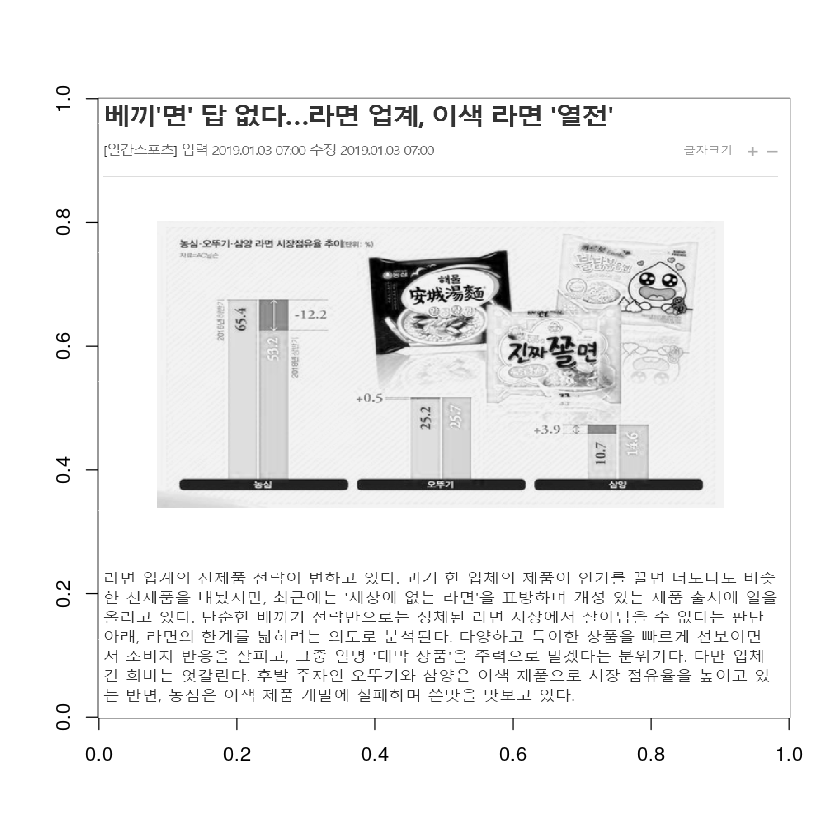

In [3]:
# 이미지 불러오기
pic_2 <- pic_1[,,1]
image(t(pic_2)[,nrow(pic_2):1], col=grey(seq(0,1,length.out=256)))

라면 판매율 TOP3라고 할 수 있는 농심, 오뚜기, 삼양은 현재 음식 관련 제품들로 치열한 경쟁을 펼치고 있다.   
현재 후발 주자인 오뚜기와 삼양은 이색 제품으로 시장 점유율을 높이고 있는 반면, 농심은 이색 제품 개발에 실패하며 쓴맛을 보고 있다.   
그렇다면 이 기업들의 주가지수 현황은 어떠할까?   
# --------------------------------------------------------------------------------------------------------------
# 1. TOP3 기업 주가지수 및 외부 요인 현황 분석   

## > 농심

In [4]:
n <- read.csv('../Data/농심.csv', fileEncoding="CP949", encoding="UTF-8")
names(n) <- c("날짜","종가","대비","거래량","거래대금","시가","고가","저가","시가총액","상장주식수")
nongshim <- orderBy(~날짜, data = n)

In [5]:
nongshim$연도 <- substr(nongshim$날짜, 1, 4)
nongshim$월 <- substr(nongshim$날짜, 6, 7)
nongshim$일 <- substr(nongshim$날짜, 9, 10)
nongshim <- nongshim[,c(1,11,12,13,2,3,4,5,6,7,8,9,10)] # 컬럼 순서 바꾸기
head(nongshim)

,날짜,연도,월,일,종가,대비,거래량,거래대금,시가,고가,저가,시가총액,상장주식수
1226,2014-01-02,2014,01,02,251000,0,23071,5852140000,249000,256000,249000,1526743,6082642
1225,2014-01-03,2014,01,03,259000,8000,47507,12192800500,251500,260500,251500,1575404,6082642
1224,2014-01-06,2014,01,06,262500,3500,34170,8913629500,257500,262500,256000,1596694,6082642
1223,2014-01-07,2014,01,07,261000,-1500,27989,7362108000,259000,264500,259000,1587570,6082642
1222,2014-01-08,2014,01,08,264500,3500,28517,7570813000,261000,268500,260000,1608859,6082642
1221,2014-01-09,2014,01,09,264500,0,22401,5987313500,265000,268500,264500,1608859,6082642


In [6]:
summary(nongshim)

         날짜          연도                월                 일           
 2014-01-02:   1   Length:1226        Length:1226        Length:1226       
 2014-01-03:   1   Class :character   Class :character   Class :character  
 2014-01-06:   1   Mode  :character   Mode  :character   Mode  :character  
 2014-01-07:   1                                                           
 2014-01-08:   1                                                           
 2014-01-09:   1                                                           
 (Other)   :1220                                                           
      종가             대비               거래량          거래대금        
 Min.   :214000   Min.   :-43500.00   Min.   :  3282   Min.   :8.187e+08  
 1st Qu.:269750   1st Qu.: -3000.00   1st Qu.: 13578   1st Qu.:4.052e+09  
 Median :313000   Median :  -500.00   Median : 19195   Median :5.971e+09  
 Mean   :314553   Mean   :     2.85   Mean   : 23126   Mean   :7.390e+09  
 3rd Qu.:344000   3rd Qu.:  3000.0

## > 오뚜기

In [7]:
o <- read.csv('../Data/오뚜기.csv', fileEncoding="CP949", encoding="UTF-8")
names(o) <- c("날짜","종가","대비","거래량","거래대금","시가","고가","저가","시가총액","상장주식수")
ottugi <- orderBy(~날짜, data = o)

In [8]:
ottugi$연도 <- substr(ottugi$날짜, 1, 4)
ottugi$월 <- substr(ottugi$날짜, 6, 7)
ottugi$일 <- substr(ottugi$날짜, 9, 10)
ottugi <- ottugi[,c(1,11,12,13,2,3,4,5,6,7,8,9,10)] # 컬럼 순서 바꾸기
head(ottugi)

,날짜,연도,월,일,종가,대비,거래량,거래대금,시가,고가,저가,시가총액,상장주식수
1226,2014-01-02,2014,01,02,407500,9500,15168,6205181000,396500,418500,386000,1401800,3440000
1225,2014-01-03,2014,01,03,386500,-21000,7560,2960196500,406500,406500,386000,1329560,3440000
1224,2014-01-06,2014,01,06,382500,-4000,4547,1751204500,386500,390500,381000,1315800,3440000
1223,2014-01-07,2014,01,07,384500,2000,3741,1454030500,382000,393500,382000,1322680,3440000
1222,2014-01-08,2014,01,08,386500,2000,4097,1604348500,383500,399000,383500,1329560,3440000
1221,2014-01-09,2014,01,09,387500,1000,4075,1590676000,386500,394500,386000,1333000,3440000


In [9]:
summary(ottugi)

         날짜          연도                월                 일           
 2014-01-02:   1   Length:1226        Length:1226        Length:1226       
 2014-01-03:   1   Class :character   Class :character   Class :character  
 2014-01-06:   1   Mode  :character   Mode  :character   Mode  :character  
 2014-01-07:   1                                                           
 2014-01-08:   1                                                           
 2014-01-09:   1                                                           
 (Other)   :1220                                                           
      종가              대비               거래량          거래대금        
 Min.   : 368000   Min.   :-147000.0   Min.   :   575   Min.   :3.482e+08  
 1st Qu.: 618250   1st Qu.:  -9000.0   1st Qu.:  3009   1st Qu.:1.928e+09  
 Median : 741000   Median :   -500.0   Median :  4300   Median :3.037e+09  
 Mean   : 738746   Mean   :    265.9   Mean   :  5345   Mean   :4.296e+09  
 3rd Qu.: 821750   3rd Qu.:  

## > 삼양

In [10]:
s <- read.csv('../Data/삼양.csv', fileEncoding="CP949", encoding="UTF-8")
names(s) <- c("날짜","종가","대비","거래량","거래대금","시가","고가","저가","시가총액","상장주식수")
samyang <- orderBy(~날짜, data = s)

In [11]:
samyang$연도 <- substr(samyang$날짜, 1, 4)
samyang$월 <- substr(samyang$날짜, 6, 7)
samyang$일 <- substr(samyang$날짜, 9, 10)
samyang <- samyang[,c(1,11,12,13,2,3,4,5,6,7,8,9,10)] # 컬럼 순서 바꾸기
head(samyang)

,날짜,연도,월,일,종가,대비,거래량,거래대금,시가,고가,저가,시가총액,상장주식수
1226,2014-01-02,2014,01,02,24400,-250,28215,686700000,24650,24650,24050,183806,7533015
1225,2014-01-03,2014,01,03,25200,800,104812,2623945250,24400,25350,24350,189832,7533015
1224,2014-01-06,2014,01,06,25350,150,76733,1920138650,24750,25500,24550,190962,7533015
1223,2014-01-07,2014,01,07,25150,-200,92880,2341579100,25500,25850,24200,189455,7533015
1222,2014-01-08,2014,01,08,25150,0,30060,751421500,25150,25300,24700,189455,7533015
1221,2014-01-09,2014,01,09,26700,1550,141389,3668248700,25150,26750,25000,201132,7533015


In [12]:
summary(samyang)

         날짜          연도                월                 일           
 2014-01-02:   1   Length:1226        Length:1226        Length:1226       
 2014-01-03:   1   Class :character   Class :character   Class :character  
 2014-01-06:   1   Mode  :character   Mode  :character   Mode  :character  
 2014-01-07:   1                                                           
 2014-01-08:   1                                                           
 2014-01-09:   1                                                           
 (Other)   :1220                                                           
      종가             대비              거래량           거래대금        
 Min.   : 20550   Min.   :-7000.00   Min.   :   4880   Min.   :1.033e+08  
 1st Qu.: 24200   1st Qu.: -500.00   1st Qu.:  23054   1st Qu.:6.166e+08  
 Median : 29825   Median :  -50.00   Median :  40162   Median :1.626e+09  
 Mean   : 44102   Mean   :   22.31   Mean   :  68666   Mean   :3.536e+09  
 3rd Qu.: 58475   3rd Qu.:  400.00

# -----------------------------------------------------------------------------------------------------------

## 1) 연도별  각 기업 주가 및 환율 분석

### ① 종가 히스토그램 및 분위수 그림
##### * 종가 : 장 마감 때 가격 

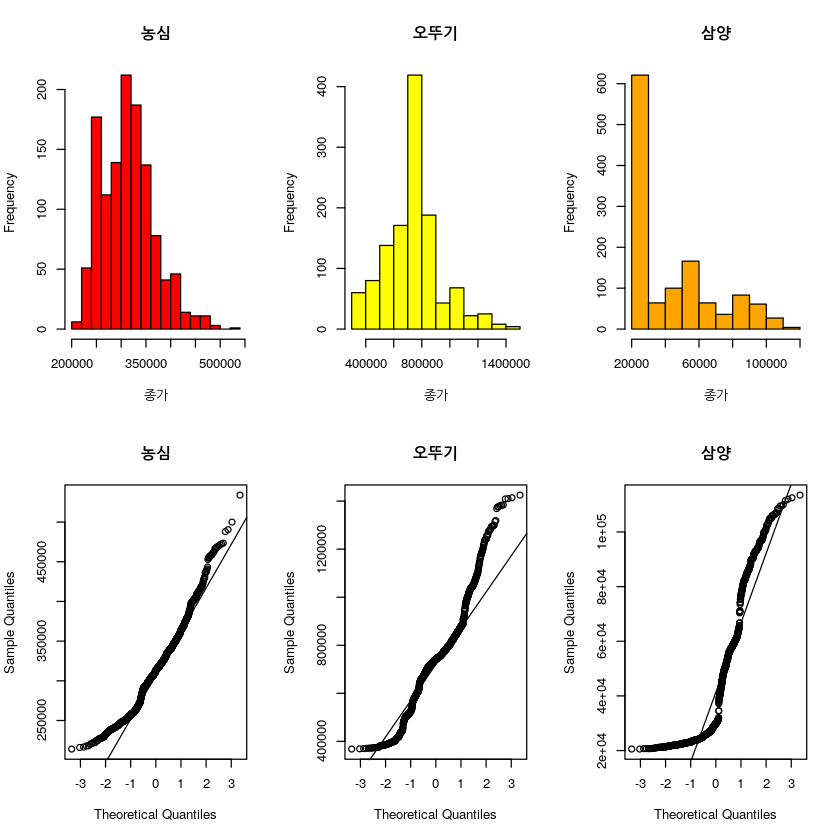

In [109]:
par(mfrow = c(2,3))
hist(nongshim$종가, main = "농심", xlab = "종가", col = "red")
hist(ottugi$종가, main = "오뚜기", xlab = "종가", col = "yellow")
hist(samyang$종가, main = "삼양", xlab = "종가", col = "orange")

qqnorm(nongshim$종가, main = "농심")
qqline(nongshim$종가)

qqnorm(ottugi$종가, main = "오뚜기")
qqline(ottugi$종가)

qqnorm(samyang$종가, main = "삼양")
qqline(samyang$종가)

히스토그램으로 확인한 결과 종가 데이터가 정규분포가 아닌 것을 확인   
분위수 그림 확인 결과 마찬가지로 정규분포가 아닌 것을 확인  
   
※분위수 그림이란?   
대각선(qqline())을 기준으로 산점도 점들이    
가깝게 선형을 이루며 붙어 있으면 정규성을 보인다고 평가하고   
그렇지 않으면 정규성을 띠지 않는다고 보는 것

In [105]:
shapiro.test(nongshim$종가)
shapiro.test(ottugi$종가)
shapiro.test(samyang$종가)


	Shapiro-Wilk normality test

data:  nongshim$종가
W = 0.97073, p-value = 4.846e-15



	Shapiro-Wilk normality test

data:  ottugi$종가
W = 0.95709, p-value < 2.2e-16



	Shapiro-Wilk normality test

data:  samyang$종가
W = 0.82649, p-value < 2.2e-16


shapiro.test 결과 p값이 모두 0.05보다 작아 귀무가설 기각, 즉 정규분포가 아니다.   
따라서 part_02의 회귀분석을 통한 종가 예측을 시작할 때 주가의 변동을 줄이기 위해   
최근 1년치 데이터를 sampling 해보는 것이 좋겠다.

### ② 종가 / 시가총액 추세 비교

In [14]:
year_nongshim <- aggregate(종가 ~ 연도, nongshim, mean)
year_ottugi <- aggregate(종가 ~ 연도, ottugi, mean)
year_samyang <- aggregate(종가 ~ 연도, samyang, mean)
year_nongshim_s <- aggregate(시가총액 ~ 연도, nongshim, mean)
year_ottugi_s <- aggregate(시가총액 ~ 연도, ottugi, mean)
year_samyang_s <- aggregate(시가총액 ~ 연도, samyang, mean)
year_nongshim_d <- aggregate(거래량 ~ 연도, nongshim, mean)
year_ottugi_d <- aggregate(거래량 ~ 연도, ottugi, mean)
year_samyang_d <- aggregate(거래량 ~ 연도, samyang, mean)

In [15]:
year_nongshim
year_ottugi
year_samyang
year_nongshim_s
year_ottugi_s
year_samyang_s

연도,종가
2014,278214.3
2015,307941.5
2016,364457.3
2017,333598.8
2018,288479.5


연도,종가
2014,478898.0
2015,822596.8
2016,872878.0
2017,758847.7
2018,759180.3


연도,종가
2014,26928.16
2015,23395.56
2016,30901.83
2017,56880.04
2018,82975.00


연도,시가총액
2014,1692278
2015,1873098
2016,2216863
2017,2029162
2018,1754718


연도,시가총액
2014,1647409
2015,2829733
2016,3002700
2017,2610436
2018,2635112


연도,시가총액
2014,202850.3
2015,176239.1
2016,232783.9
2017,428478.2
2018,625051.9


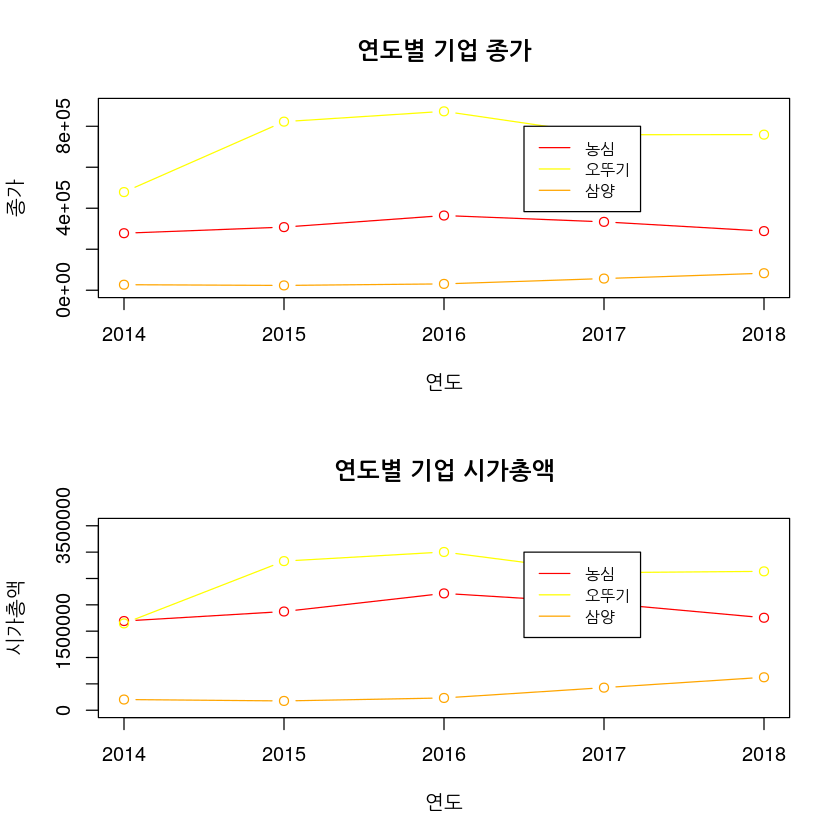

In [16]:
par(mfrow = c(2,1))
plot(year_nongshim, type = "b", col="red", lty = 1, ylim = c(0, 900000), main = "연도별 기업 종가")
lines(year_ottugi, type = "b", col="yellow", lty = 1)
lines(year_samyang, type = "b", col="orange", lty = 1)
legend(2016.5, 800000, # 좌표 위치
       c("농심","오뚜기","삼양"), # data 컬럼
       cex = 0.8, # 1을 기준으로 한 상대적 크기
       col = c("red","yellow","orange"), # 색깔 -> 데이터 컬러와 맞춰주어야함
       lty = 1
)
plot(year_nongshim_s, type = "b", col="red", lty = 1, ylim = c(0, 3500000), main = "연도별 기업 시가총액")
lines(year_ottugi_s, type = "b", col="yellow", lty = 1)
lines(year_samyang_s, type = "b", col="orange", lty = 1)
legend(2016.5, 3000000, # 좌표 위치
       c("농심","오뚜기","삼양"), # data 컬럼
       cex = 0.8, # 1을 기준으로 한 상대적 크기
       col = c("red","yellow","orange"), # 색깔 -> 데이터 컬러와 맞춰주어야함
       lty = 1
)

#### 농심은 종가와 시가총액 모두 감소하는 추세를 보여주는 반면 오뚜기와 삼양은 증가하는 추세
#### 위의 기사와 같이 오뚜기와 삼양은 이색제품으로 시장 점유율을 높이고 있는 반면, 농심은 주춤 하고있다.

### ③ 환율과 거래량 추세 비교

In [17]:
er <- read.csv('../Data/환율2.csv',  fileEncoding="CP949", encoding="UTF-8")
head(er)
er2 <- read.csv('../Data/위안 환율.csv',  fileEncoding="CP949", encoding="UTF-8")
head(er2)

날짜,통화명,환율
2014-01-02,미 달러화 (USD),1055.3
2014-01-03,미 달러화 (USD),1050.4
2014-01-06,미 달러화 (USD),1054.1
2014-01-07,미 달러화 (USD),1062.2
2014-01-08,미 달러화 (USD),1067.9
2014-01-09,미 달러화 (USD),1066.0


날짜,통화명,환율
2014.03.03,위안화 (CNH),174.19
2014.03.04,위안화 (CNH),174.94
2014.03.05,위안화 (CNH),174.82
2014.03.06,위안화 (CNH),174.82
2014.03.07,위안화 (CNH),174.97
2014.03.10,위안화 (CNH),173.91


In [18]:
er$연도 <- substr(er$날짜, 1, 4)
er$월 <- substr(er$날짜, 6, 7)
er$일 <- substr(er$날짜, 9, 10)
er <- er[,c(1,2,3,6,4,5)]

er2$연도 <- substr(er2$날짜, 1, 4)
er2$월 <- substr(er2$날짜, 6, 7)
er2$일 <- substr(er2$날짜, 9, 10)
er2 <- er2[,c(1,2,3,6,4,5)]

In [19]:
head(er)
head(er2)

날짜,통화명,환율,일,연도,월
2014-01-02,미 달러화 (USD),1055.3,02,2014,01
2014-01-03,미 달러화 (USD),1050.4,03,2014,01
2014-01-06,미 달러화 (USD),1054.1,06,2014,01
2014-01-07,미 달러화 (USD),1062.2,07,2014,01
2014-01-08,미 달러화 (USD),1067.9,08,2014,01
2014-01-09,미 달러화 (USD),1066.0,09,2014,01


날짜,통화명,환율,일,연도,월
2014.03.03,위안화 (CNH),174.19,03,2014,03
2014.03.04,위안화 (CNH),174.94,04,2014,03
2014.03.05,위안화 (CNH),174.82,05,2014,03
2014.03.06,위안화 (CNH),174.82,06,2014,03
2014.03.07,위안화 (CNH),174.97,07,2014,03
2014.03.10,위안화 (CNH),173.91,10,2014,03


In [20]:
year_er <- aggregate(환율 ~ 연도, er, mean)
year_er

year_er2 <- aggregate(환율 ~ 연도, er2, mean)
year_er2

연도,환율
2014,1053.034
2015,1131.325
2016,1160.307
2017,1131.087
2018,1100.230


연도,환율
2014,169.9194
2015,179.4756
2016,174.3950
2017,167.4595
2018,166.4151


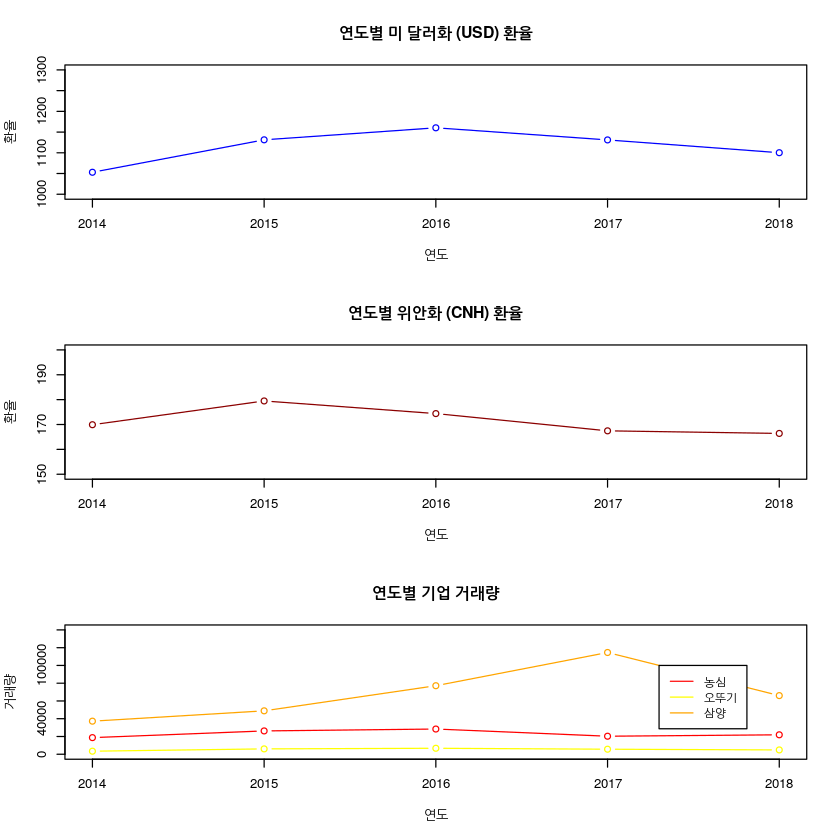

In [21]:
par(mfrow = c(3,1))
plot(year_er, type = "b", col="blue",lty = 1, ylim = c(1000, 1300), main = "연도별 미 달러화 (USD) 환율")

plot(year_er2, type = "b", col="darkred",lty = 1, ylim = c(150, 200), main = "연도별 위안화 (CNH) 환율")

plot(year_nongshim_d, type = "b", col="red", lty = 1, ylim = c(0, 140000), main = "연도별 기업 거래량")
lines(year_ottugi_d, type = "b", col="yellow", lty = 1)
lines(year_samyang_d, type = "b", col="orange", lty = 1)
legend(2017.3, 100000, # 좌표 위치
       c("농심","오뚜기","삼양"), # data 컬럼
       cex = 0.9, # 1을 기준으로 한 상대적 크기
       col = c("red","yellow","orange"), # 색깔 -> 데이터 컬러와 맞춰주어야함
       lty = 1
)

환율이 증가(원화가치 약세)하게 되면 외국인 투자자들은 대부분 주식을 매도 할 것이다.   
반대로 환율이 감소(원화가치 강세)하게 되면 외국인 투자자들은 주식을 매수 할 것이다.   
매도/매수 가 얼마나 됐는지는 거래량을 보고 알 수 있는데,    
2014 ~ 2016년간 달러화 환율이 점차 증가 -> 주식의 거래량 또한 증가 하는것을 알 수 있다.   
즉 환율이 증가해 원화가치가 떨어져 많은 외국인 투자자들이 주식을 매도하기 시작 한 것이다.   
   
하지만 환율이 하락하는 구간인 2016 ~ 2017년에 삼양의 거래량이 높게 올랐다. 이 구간은 위안화 환율과 연관이 있는데    
2017년 삼양식품은 중국 업체와 중국 총판에 대한 업무협약을 맺었으며, 엄청난 양의 신제품을 쏟아내기 시작하였다.   
그 신제품은 삼양의 대표 판매제품이라고 할 수 있는 불닭볶음면의 여러가지 시리즈 제품이였다.   
이미 성공을 맛 본 제품이기 때문에 그에 따른 시리즈 제품들 또한 성공할 확률이 높았다고 판단 한 것이다.   
이러한 소식에 많은 투자자들이 주식을 매수 한 것이다.

### ④ 각 기업의 주가는 서로에게 영향을 미칠까

귀무가설 : 기업 주가는 서로 관련이 없다.   
대립가설 : 기업 주가는 서로 관련이 있다.

In [22]:
cor.test(ottugi$종가, nongshim$종가)
cor.test(ottugi$종가, samyang$종가)
cor.test(samyang$종가, nongshim$종가)


	Pearson's product-moment correlation

data:  ottugi$종가 and nongshim$종가
t = 39.718, df = 1224, p-value < 2.2e-16
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.7248643 0.7738718
sample estimates:
      cor 
0.7503975 



	Pearson's product-moment correlation

data:  ottugi$종가 and samyang$종가
t = 2.3894, df = 1224, p-value = 0.01702
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.01219955 0.12365356
sample estimates:
       cor 
0.06813914 



	Pearson's product-moment correlation

data:  samyang$종가 and nongshim$종가
t = -2.0247, df = 1224, p-value = 0.04312
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 -0.113394677 -0.001795002
sample estimates:
        cor 
-0.05777533 


p값은 모두 0.05보다 작아 귀무가설 기각 대립가설 채택, 따라서 각 기업 주가는 서로 관련이 있다.    
모두 상관분석이 가능 하지만, 가장 뚜렷한 상관관계(0.7503975)를 보여주는 오뚜기와 농심을 분석 실시

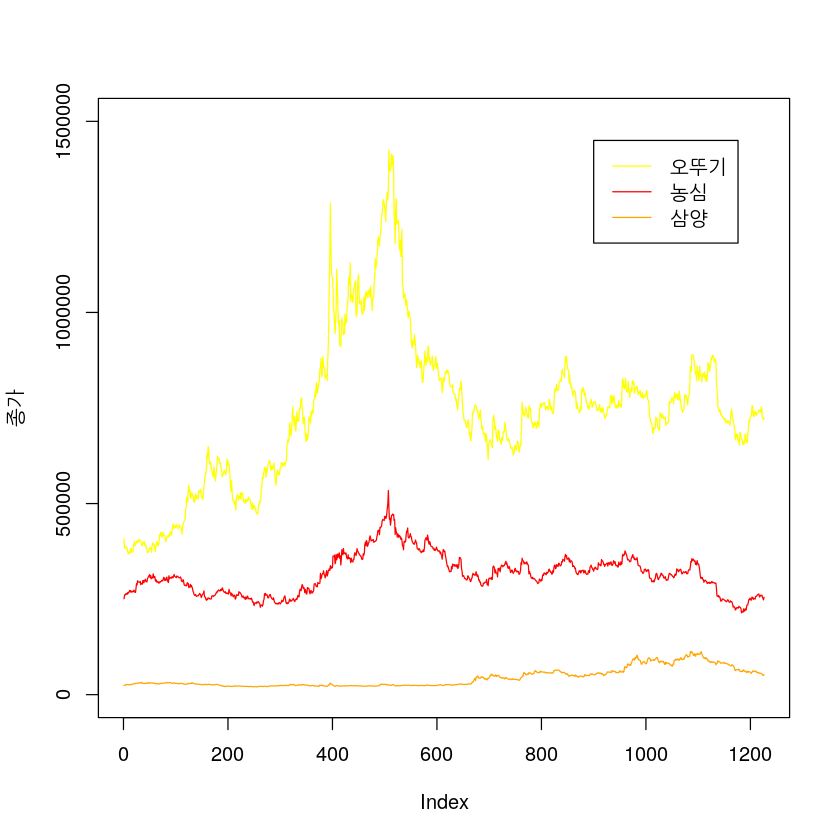

In [23]:
plot(ottugi$종가, type="l", col="yellow", lty=1, ylim = c(0, 1500000), ylab = "종가")
lines(nongshim$종가, type="l", col="red", lty=1)
lines(samyang$종가, type="l", col="orange", lty=1)
legend(900, 1450000, # 좌표 위치
       c("오뚜기","농심","삼양"), # data 컬럼
       cex = 1, # 1을 기준으로 한 상대적 크기
       col = c("yellow","red","orange"), # 색깔 -> 데이터 컬러와 맞춰주어야함
       lty = 1
)

추세 역시 오뚜기와 농심은 비슷한 형태의 추세를 보여주고 있다.   

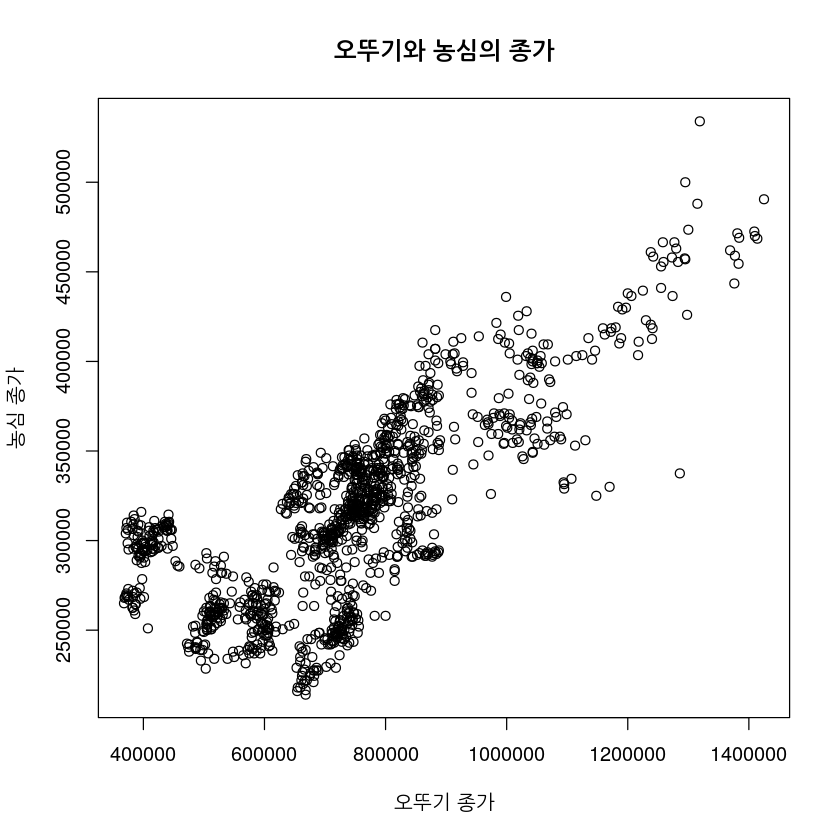

In [24]:
plot(ottugi$종가, nongshim$종가,
     ylab = "농심 종가",
     xlab = "오뚜기 종가",
     main = "오뚜기와 농심의 종가"
    )
r <- lm(ottugi$종가 ~ nongshim$종가)
abline(r)

오뚜기의 종가가 상승할때 농심의 종가도 상승하는 산점도 확인 가능   
즉 투자자들은 주식을 매수할 때 오뚜기와 농심의 주가를 같이 분석할 것이고, 삼양은 별개의 주가로 분석을 한다는 것을 알 수 있다.

# -----------------------------------------------------------------------------------------------------------

## 2) 각 기업 최근 주가 데이터 현황 분석

### ① 각 기업의 최근 1년 시가 총액
##### 시가총액 : 주식시장에서 한 기업의 시장 가치를 나타내는 지표

In [25]:
nongshim_2018 <- nongshim[nongshim$연도 == 2018,]
ottugi_2018 <- ottugi[ottugi$연도 == 2018,]
samyang_2018 <- samyang[samyang$연도 == 2018,]

In [26]:
library(ggplot2)

In [27]:
nongshim_2018$날짜 <- factor(nongshim_2018$날짜)
ottugi_2018$날짜 <- factor(ottugi_2018$날짜)
samyang_2018$날짜 <- factor(samyang_2018$날짜)

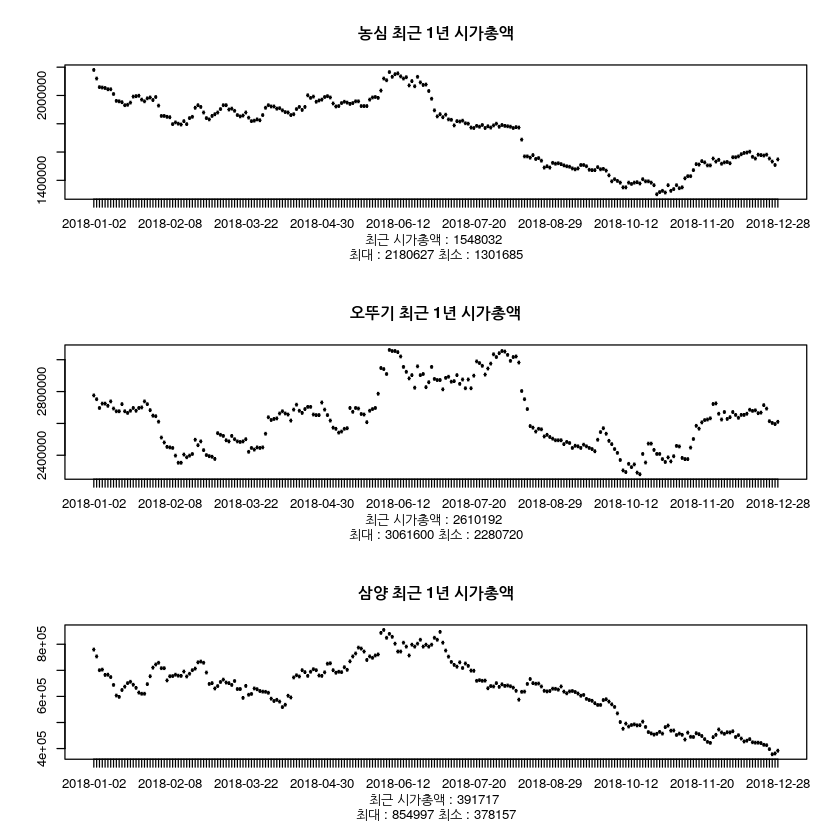

In [110]:
par(mfrow = c(3,1))
plot(x = nongshim_2018$날짜, y = nongshim_2018$시가총액, xlab = paste("\n최근 시가총액 :",tail(nongshim_2018$시가총액,1),
                                                               "\n최대 :",max(nongshim_2018$시가총액),
                                                               "최소 :",min(nongshim_2018$시가총액)),
                                                                main = "농심 최근 1년 시가총액",)
plot(x = ottugi_2018$날짜, y = ottugi_2018$시가총액, xlab = paste("최근 시가총액 :",tail(ottugi_2018$시가총액,1),
                                                               "\n최대 :",max(ottugi_2018$시가총액),
                                                               "최소 :",min(ottugi_2018$시가총액)),
                                                                main = "오뚜기 최근 1년 시가총액")
plot(x = samyang_2018$날짜, y = samyang_2018$시가총액, xlab = paste("최근 시가총액 :",tail(samyang_2018$시가총액,1),
                                                               "\n최대 :",max(samyang_2018$시가총액),
                                                               "최소 :",min(samyang_2018$시가총액)),
                                                                main = "삼양 최근 1년 시가총액")

세 기업중 가장 높은 시가 총액을 보여준건 "오뚜기" 기업이며 가장 주식시장 가치가 높은 회사라고 알 수 있다.   
최근 시가 총액도 마찬가지로 "오뚜기" 기업이 가장 높았으며 삼양은 시가 총액이 내려가는 추세를 보여주고 있다.   
   
오뚜기 기업의 시가 총액이 경쟁 기업 농심과 삼양에 비해 월등히 높은 이유가 무엇일까?  

다음은 http://www.ekn.kr/news/article.html?no=409218 에 실린 기사의 내용 일부이다.   
[기업분석] 오뚜기, 높은 기업가치를 지속할 수 있는 요건   
   
오뚜기는 전통 라면시장에서의 꾸준한 점유율과 프리미엄 제품 출시,    
긍정적인 기업이미지 등으로 증시참여자들에게 높은 기업가치를 받아왔다.     
올해는 추가적인 라면시장 점유율 상승과 지배구조 개선을 통해 수익 성장을 이어갈 수 있을지 관심이 집중된다.    
   
    
◇ 프리미엄 제품 출시 여부…"미역국라면 출시 등으로 11% 매출 늘어나"   
오뚜기 투자 판단에 있어 중요한 것은 증시에서 형성된 높은 기업가치를 유지할 수 있는지다.    
현재 증권가에서는 프리미엄 면제품의 출시 여부를 주목하고 있다.   
안정적인 매출 성장과 이익률로 시장지배력을 유지하는 동시에 프리미엄 제품이 출시되면 주가 상승에도 모멘텀이 되기 때문이다.    
지난 2016년에도 프리미엄 제품인 진짬뽕의 높은 매출이 오뚜기의 기업가치를 상승시켰다.    

In [29]:
s_sum_o <- as.matrix(aggregate(시가총액 ~ 연도, ottugi, sum))
df_s_sum_o <- data.frame(시가총액 = as.numeric(s_sum_o[,2]))
row.names(df_s_sum_o) <- c(2014,2015,2016,2017,2018)
df_s_sum_o

,시가총액
2014,403615200
2015,701773760
2016,738664320
2017,634336000
2018,642967419


In [30]:
j_sum_o <- as.matrix(aggregate(종가 ~ 연도, ottugi, mean))
df_j_sum_o <- data.frame(종가 = as.numeric(j_sum_o[,2]))
row.names(df_j_sum_o) <- c(2014,2015,2016,2017,2018)
df_j_sum_o

,종가
2014,478898.0
2015,822596.8
2016,872878.0
2017,758847.7
2018,759180.3


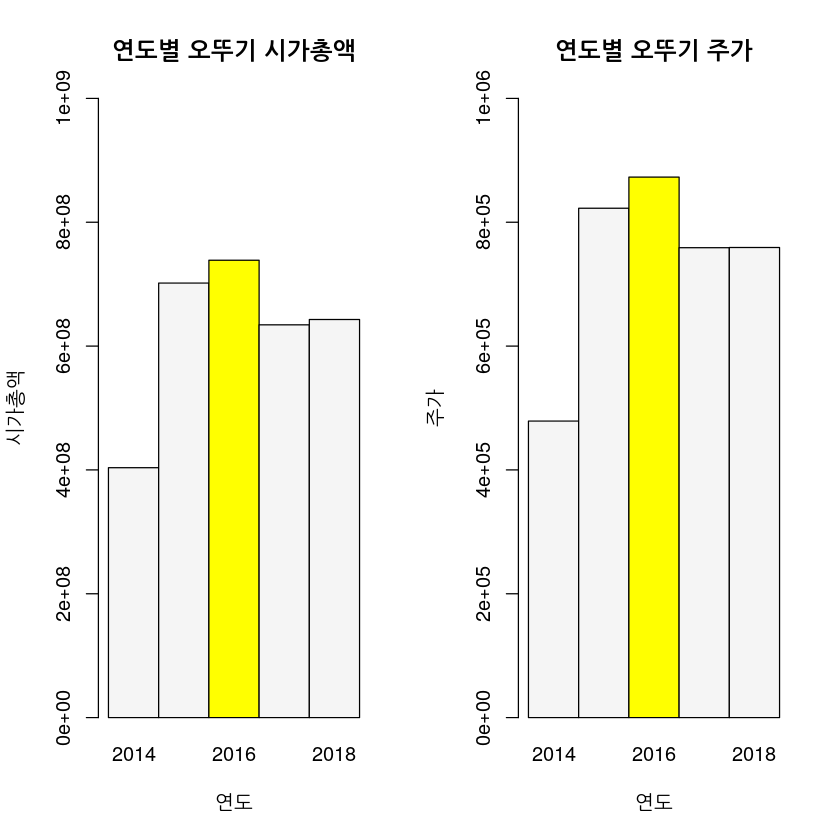

In [31]:
par(mfrow = c(1,2))

df_s_sum_o <- as.matrix(df_s_sum_o)
df_s_sum_o_b <- barplot(df_s_sum_o,
        beside = T,
        main = "연도별 오뚜기 시가총액",
        xlab = "연도",
        ylab = "시가총액",
        names=c(2014, 2015, 2016, 2017, 2018),
        border = "black",
        ylim = c(0,1000000000),
        col = c("white smoke","white smoke","yellow","white smoke","white smoke")
       )

df_j_sum_o <- as.matrix(df_j_sum_o)
df_j_sum_o_b <- barplot(df_j_sum_o,
        beside = T,
        main = "연도별 오뚜기 주가",
        xlab = "연도",
        ylab = "주가",
        names=c(2014, 2015, 2016, 2017, 2018),
        border = "black",
        ylim = c(0,1000000),
        col = c("white smoke","white smoke","yellow","white smoke","white smoke")
       )

실제로 진짬뽕이 출시된 2016년 가장 높은 시가총액 및 주가를 기록 하였다.

### ② 각 기업의 2018.12(최근) 거래량     
##### 거래량이 많다는것 -> 즉 거래가 활발히 이루어진다는 것은 내가 팔고 싶을 때 주식을 팔 수 있는 시장
##### 반대로 가격이 상승하고 있다고 하더라도 거래량이 적다면 내가 원하는 가격에 매도하지 못할 수도 있다.

In [32]:
nongshim_2018_12 <- nongshim_2018[nongshim_2018$월 == 12,]
ottugi_2018_12 <- ottugi_2018[ottugi_2018$월 == 12,]
samyang_2018_12 <- samyang_2018[samyang_2018$월 == 12,]

In [33]:
nongshim_2018_12$날짜 <- factor(nongshim_2018_12$날짜)
ottugi_2018_12$날짜 <- factor(ottugi_2018_12$날짜)
samyang_2018_12$날짜 <- factor(samyang_2018_12$날짜)

In [34]:
#library(gridExtra)

In [35]:
nongshim_2018_12[nongshim_2018_12$일 == 28,7]
ottugi_2018_12[ottugi_2018_12$일 == 28,7]
samyang_2018_12[samyang_2018_12$일 == 28,7]

[1] 12268

[1] 2713

[1] 32682

In [36]:
vol <- data.frame(거래량 = nongshim_2018_12[nongshim_2018_12$일 == 28,7])
volume <- rbind(vol, ottugi_2018_12[ottugi_2018_12$일 == 28,7], samyang_2018_12[samyang_2018_12$일 == 28,7])
row.names(volume) <- c("농심","오뚜기","삼양")
volume

,거래량
농심,12268
오뚜기,2713
삼양,32682


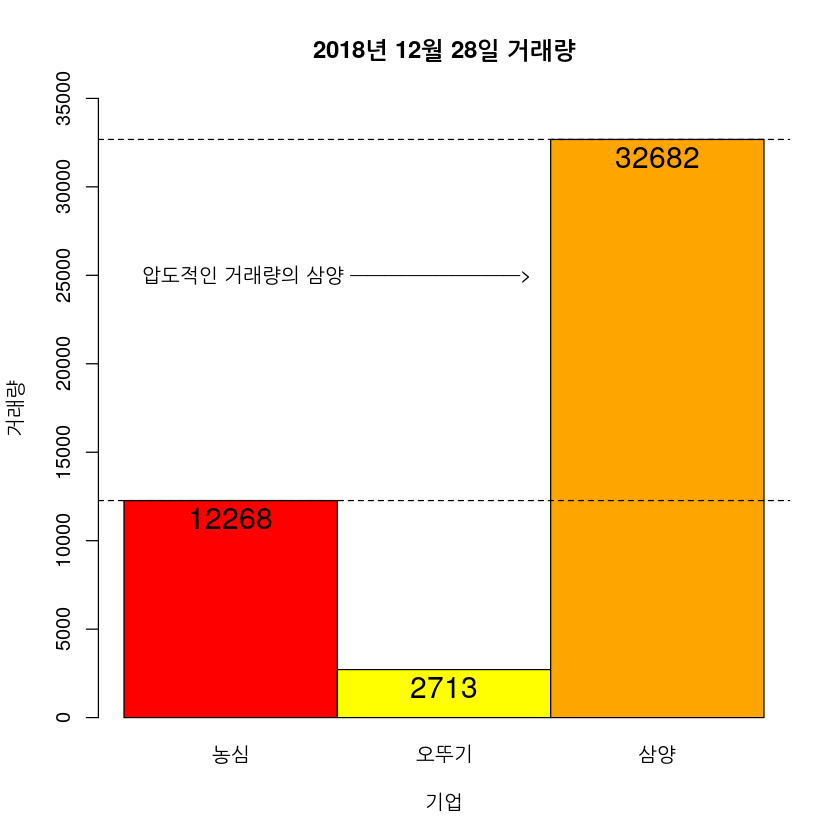

In [37]:
volume <- as.matrix(volume)
bar_volume <- barplot(volume,
        beside = T,
        main = "2018년 12월 28일 거래량",
        xlab = "기업",
        ylab = "거래량",
        names=c("농심","오뚜기","삼양"),
        border = "black",
        ylim = c(0,35000),
        col = c("red","yellow","orange")
       )
abline(h = 32682, col = "black", lty = 2, lwd = 1)
abline(h = 12268, col = "black", lty = 2, lwd = 1)
text(x = bar_volume, y = c(11268,1713,31682), labels = paste(c(12268,2713,32682)),cex = 1.5)
text(x = 2, y = 25000, labels = paste("압도적인 거래량의 삼양 ――――――――――>"),cex = 1, col = "black")

가장 최근을 기점으로 거래량이 가장 높은 기업은 "삼양"이며, 다른 기업에 비해 압도적으로 높은 거래량을 보여준다.   
따라서 현재 삼양 주식 거래가 다른 기업에 비해 활발하게 진행중이라는 것을 알 수 있다.    
즉, 내가 팔고 싶을 때 주식을 팔 수 있는 시장

# -----------------------------------------------------------------------------------------------------------

## 3) 각 기업 라면 가격과 종가 관계 확인

In [38]:
noodle <- read.csv('../Data/라면가격.csv')
rownames(noodle) <- c("2017-10","2017-11","2017-12","2018-01","2018-02","2018-03","2018-04","2018-05","2018-06",
                               "2018-07","2018-08","2018-09","2018-10","2018-11","2018-12")

In [39]:
noodle_j <- cbind(noodle,
      data.frame(농심종가 = c(343718.8,351250,355236.8,329568.2,305722.2,306809.25,316261.9,321575,345000,297750,270295.5,245352.9,226881.0,238568.2,257026.3)),
      data.frame(오뚜기종가 = c(763875,780181.8,801157.9,785909.1,713444.4,716223.8,773381,768300,855894.7,842772.7,804000,719411.8,683190.5,700227.3,735842.1)),
      data.frame(삼양종가 = c(59993.75,62077.27,86115.79,87722.73,92816.67,84652.38,85076.19,97515,106763.16,95477.27,84204.55,79841.18,66319.05,60272.73,56484.21))
     )

In [40]:
noodle_j

,신라면,삼양라면,진라면,농심종가,오뚜기종가,삼양종가
2017-10,3407,3285,2790,343718.8,763875.0,59993.75
2017-11,3415,3225,2776,351250.0,780181.8,62077.27
2017-12,3416,3219,2769,355236.8,801157.9,86115.79
2018-01,3389,3127,2720,329568.2,785909.1,87722.73
2018-02,3399,3261,2760,305722.2,713444.4,92816.67
2018-03,3394,3281,2771,306809.2,716223.8,84652.38
2018-04,3387,3101,2810,316261.9,773381.0,85076.19
2018-05,3392,3146,2743,321575.0,768300.0,97515.00
2018-06,3386,3184,2778,345000.0,855894.7,106763.16
2018-07,3391,3242,2818,297750.0,842772.7,95477.27


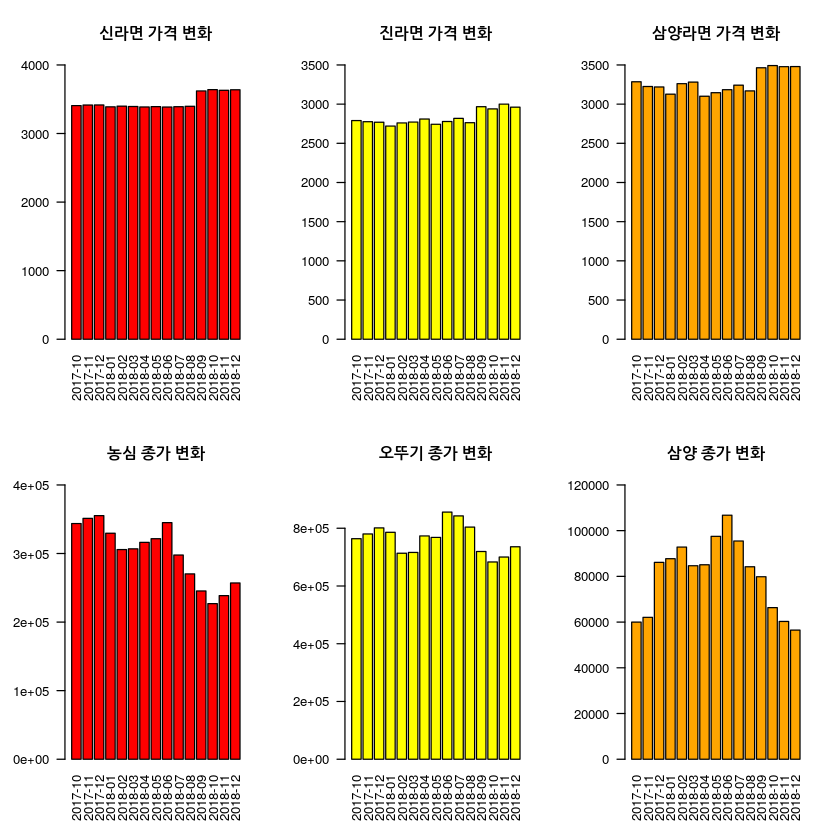

In [41]:
par(mfrow = c(2,3))
barplot(noodle_j$신라면, main = "신라면 가격 변화", las = 2, col = "red", ylim = c(0,4000),
        names = c("2017-10","2017-11","2017-12","2018-01","2018-02","2018-03","2018-04",
                  "2018-05","2018-06","2018-07","2018-08","2018-09","2018-10","2018-11","2018-12"))

barplot(noodle_j$진라면, main = "진라면 가격 변화", las = 2, col = "yellow", ylim = c(0,3500),
        names = c("2017-10","2017-11","2017-12","2018-01","2018-02","2018-03","2018-04",
                  "2018-05","2018-06","2018-07","2018-08","2018-09","2018-10","2018-11","2018-12"))

barplot(noodle_j$삼양라면, main = "삼양라면 가격 변화", las = 2, col = "orange", ylim = c(0, 3500),
        names = c("2017-10","2017-11","2017-12","2018-01","2018-02","2018-03","2018-04",
                  "2018-05","2018-06","2018-07","2018-08","2018-09","2018-10","2018-11","2018-12"))

barplot(noodle_j$농심종가, main = "농심 종가 변화", las = 2, col = "red", ylim = c(0,400000),
        names = c("2017-10","2017-11","2017-12","2018-01","2018-02","2018-03","2018-04",
                  "2018-05","2018-06","2018-07","2018-08","2018-09","2018-10","2018-11","2018-12"))

barplot(noodle_j$오뚜기종가, main = "오뚜기 종가 변화", las = 2, col = "yellow", ylim = c(0,950000),
        names = c("2017-10","2017-11","2017-12","2018-01","2018-02","2018-03","2018-04",
                  "2018-05","2018-06","2018-07","2018-08","2018-09","2018-10","2018-11","2018-12"))

barplot(noodle_j$삼양종가, main = "삼양 종가 변화", las = 2, col = "orange", ylim = c(0,120000),
        names = c("2017-10","2017-11","2017-12","2018-01","2018-02","2018-03","2018-04",
                  "2018-05","2018-06","2018-07","2018-08","2018-09","2018-10","2018-11","2018-12"))

세 기업 모두 라면 가격이 증가하고 있으며, 주가는 감소하는 추세

In [42]:
cor.test(noodle_j$농심종가, noodle_j$신라면)
cor.test(noodle_j$오뚜기종가, noodle_j$진라면)
cor.test(noodle_j$삼양종가, noodle_j$삼양라면)


	Pearson's product-moment correlation

data:  noodle_j$농심종가 and noodle_j$신라면
t = -5.3034, df = 13, p-value = 0.000143
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 -0.9407246 -0.5460426
sample estimates:
       cor 
-0.8269837 



	Pearson's product-moment correlation

data:  noodle_j$오뚜기종가 and noodle_j$진라면
t = -2.4853, df = 13, p-value = 0.02733
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 -0.83658346 -0.07793585
sample estimates:
       cor 
-0.5675404 



	Pearson's product-moment correlation

data:  noodle_j$삼양종가 and noodle_j$삼양라면
t = -3.0341, df = 13, p-value = 0.00959
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 -0.8693809 -0.1963686
sample estimates:
       cor 
-0.6438637 


귀무가설 : 각 기업 라면 가격과 종가는 관련이 없다.   
대립가설 : 각 기업 라면 가격과 종가는 관련이 있다.   
   
농심 종가와 신라면 가격의 상관관계 : -0.8269837 / p-value = 0.000143   
오뚜기 종가와 진라면 가격의 상관관계 : -0.5675404 / p-value = 0.02733   
삼양 종가와 삼양라면 가격의 상관관계 : -0.6438637 / p-value = 0.00959   
   
세 기업 모두 음의 상관관계이며, p-value < 0.05 ====> 즉, 각 기업의 라면 가격은 종가와 관련이 있다.

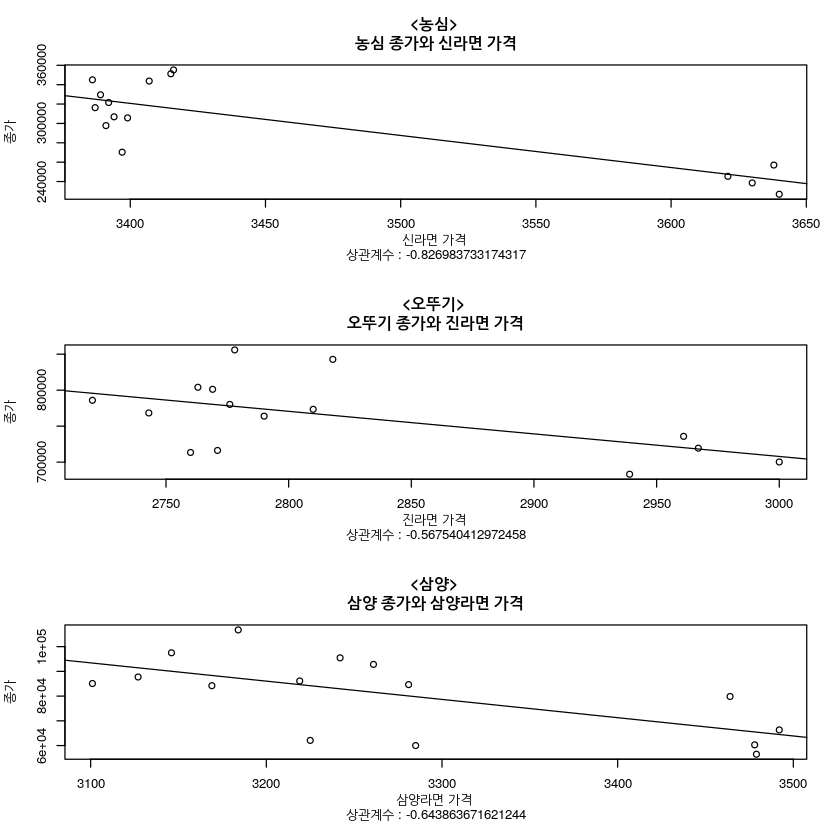

In [111]:
par(mfrow = c(3,1))
# 산점도
plot(noodle_j$농심종가 ~ noodle_j$신라면,
    main = "<농심> \n농심 종가와 신라면 가격",
    xlab = paste("신라면 가격", "\n상관계수 :",cor(noodle_j$농심종가,noodle_j$신라면)),
    ylab = "종가") # ~ 연산자 기준으로 뒤에 쓰는게 종속변수, 앞에 쓰는게 독립변수
# 회귀분석 : lm(종속변수 ~ 독립변수)
n_n <- lm(noodle_j$농심종가 ~ noodle_j$신라면)
# 회귀선 그리기
abline(n_n)

plot(noodle_j$오뚜기종가 ~ noodle_j$진라면,
    main = "<오뚜기> \n오뚜기 종가와 진라면 가격",
    xlab = paste("진라면 가격", "\n상관계수 :",cor(noodle_j$오뚜기종가, noodle_j$진라면)),
    ylab = "종가") # ~ 연산자 기준으로 뒤에 쓰는게 종속변수, 앞에 쓰는게 독립변수
# 회귀분석 : lm(종속변수 ~ 독립변수)
n_o <- lm(noodle_j$오뚜기종가 ~ noodle_j$진라면)
# 회귀선 그리기
abline(n_o)

plot(noodle_j$삼양종가 ~ noodle_j$삼양라면,
    main = "<삼양> \n삼양 종가와 삼양라면 가격",
    xlab = paste("삼양라면 가격", "\n상관계수 :",cor(noodle_j$삼양종가,noodle_j$삼양라면)),
    ylab = "종가") # ~ 연산자 기준으로 뒤에 쓰는게 종속변수, 앞에 쓰는게 독립변수
# 회귀분석 : lm(종속변수 ~ 독립변수)
n_s <- lm(noodle_j$삼양종가 ~ noodle_j$삼양라면)
# 회귀선 그리기
abline(n_s)

※ 라면 가격과 종가(주가)가 음의 상관관계(?)  
   
물가가 상승하는 인플레이션은 두 가지의 종류로 나눌 수 있다.    
   
1) 수요 견인 인플레이션   
수요가 좋아져서 경기가 확장되는 현상  
   
2) 비용 상승 인플레이션   
유가나 원자재가가 올라 자연스레 완제품의 가격이 상승하는 현상   
   
즉, 수요 견인 인플레이션은 주가에 긍정적인 현상을 가져다 주지만 비용상승 인플레이션은 주가에 달갑지만은 않은 상황이다.        
인플레이션으로 인해 물가가 상승하게 되어 실질 소득이 감소하면 자연히 소비 역시 감소되어 기업의 실적이 나빠지게 된다.    
결론적으로 상관관계와 막대그래프를 미루어 보았을 때, 비용 상승 인플레이션과 관련이 있다

# -----------------------------------------------------------------------------------------------------------

## 4) 각 기업의 재무제표   
매출액, 영업이익, 순이익, 자산, 부채, 자본과 종가(주가)와의 관계 확인   
2017.12 / 2018.03 / 2018.06 / 2018.09

주가 변동 요인 : 매출액, 영업이익, 순이익, 자산, 부채, 자본   
   
농심    
매출액 : 4615, 4693, 4442, 4678      
영업이익 : 105, 283, 29, 142    
순이익 : 126, 283, 83, 167   
자산 : 23174, 23628, 23731, 23882   
부채 : 4702, 5107, 5123, 5104   
자본 : 18472, 18522, 18607, 18778   
   
오뚜기   
매출액 : 4897, 5483, 5136, 5455     
영업이익 : 263, 360, 342, 362     
순이익 : 137, 319, 263, 619      
자산 : 14058, 14975, 15146, 16249    
부채 : 4404, 5223, 5141, 5450    
자본 : 9654, 9752, 10005, 10799    
    
삼양        
매출액 : 1271, 1249, 1226, 1086     
영업이익 : 120, 172, 123, 110     
순이익 : 43, 127, 136, 85     
자산 : 3815, 3767, 3973, 3819   
부채 : 1885, 1733, 1808, 1570   
자본 : 1929, 2034, 2166, 2250    

In [44]:
n_m <- c(4615, 4693, 4442, 4678)
n_y <- c(105, 283, 29, 142)
n_s <- c(126, 283, 83, 167)
n_js <- c(23174, 23628, 23731, 23882)
n_b <- c(4702, 5107, 5123, 5104)
n_jb <- c(18472, 18522, 18607, 18778)

o_m <- c(4897, 5483, 5136, 5455)
o_y <- c(263, 360, 342, 362)
o_s <- c(137, 319, 263, 619)
o_js <- c(14058, 14975, 15146, 16249)
o_b <- c(4404, 5223, 5141, 5450)
o_jb <- c(9654, 9752, 10005, 10799)

s_m <- c(1271, 1249, 1226, 1086)
s_y <- c(120, 172, 123, 110)
s_s <- c(43, 127, 136, 85)
s_js <- c(3815, 3767, 3973, 3819)
s_b <- c(1885, 1733, 1808, 1570)
s_jb <- c(1929, 2034, 2166, 2250)

In [45]:
aggregate(종가 ~ 연도 == 2017 & 월 == 12, nongshim, mean)
aggregate(종가 ~ 연도 == 2018 & 월 == '03', nongshim, mean)
aggregate(종가 ~ 연도 == 2018 & 월 == '06', nongshim, mean)
aggregate(종가 ~ 연도 == 2018 & 월 == '09', nongshim, mean)

aggregate(종가 ~ 연도 == 2017 & 월 == 12, ottugi, mean)
aggregate(종가 ~ 연도 == 2018 & 월 == '03', ottugi, mean)
aggregate(종가 ~ 연도 == 2018 & 월 == '06', ottugi, mean)
aggregate(종가 ~ 연도 == 2018 & 월 == '09', ottugi, mean)

aggregate(종가 ~ 연도 == 2017 & 월 == 12, samyang, mean)
aggregate(종가 ~ 연도 == 2018 & 월 == '03', samyang, mean)
aggregate(종가 ~ 연도 == 2018 & 월 == '06', samyang, mean)
aggregate(종가 ~ 연도 == 2018 & 월 == '09', samyang, mean)

n_j <- c(355236.8, 306809.5, 345000, 245352.9)
o_j <- c(801157.9, 716523.8, 855894.7, 719411.8)
s_j <- c(86115.79, 84652.38, 106763.16, 79841.18)

연도 == 2017 & 월 == 12,종가
FALSE,313912.6
TRUE,355236.8


"연도 == 2018 & 월 == ""03""",종가
FALSE,314688.0
TRUE,306809.5


"연도 == 2018 & 월 == ""06""",종가
FALSE,314073.7
TRUE,345000.0


"연도 == 2018 & 월 == ""09""",종가
FALSE,315526.1
TRUE,245352.9


연도 == 2017 & 월 == 12,종가
FALSE,737763.0
TRUE,801157.9


"연도 == 2018 & 월 == ""03""",종가
FALSE,739132.8
TRUE,716523.8


"연도 == 2018 & 월 == ""06""",종가
FALSE,736901.4
TRUE,855894.7


"연도 == 2018 & 월 == ""09""",종가
FALSE,739017.4
TRUE,719411.8


연도 == 2017 & 월 == 12,종가
FALSE,43440.68
TRUE,86115.79


"연도 == 2018 & 월 == ""03""",종가
FALSE,43395.35
TRUE,84652.38


"연도 == 2018 & 월 == ""06""",종가
FALSE,43115.66
TRUE,106763.16


"연도 == 2018 & 월 == ""09""",종가
FALSE,43599.50
TRUE,79841.18


In [46]:
data_nongshim <- data.frame(매출액 = n_m, 영업이익 = n_y, 순이익 = n_s, 자산 = n_js, 부채 = n_b, 자본 = n_jb, 종가 = n_j)
row.names(data_nongshim) <- c("2017.12", "2018.03", "2018.06", "2018.09")

data_ottugi <- data.frame(매출액 = o_m, 영업이익 = o_y, 순이익 = o_s, 자산 = o_js, 부채 = o_b, 자본 = o_jb, 종가 = o_j)
row.names(data_ottugi) <- c("2017.12", "2018.03", "2018.06", "2018.09")

data_samyang <- data.frame(매출액 = s_m, 영업이익 = s_y, 순이익 = s_s, 자산 = s_js, 부채 = s_b, 자본 = s_jb, 종가 = s_j)
row.names(data_samyang) <- c("2017.12", "2018.03", "2018.06", "2018.09")

In [47]:
data_nongshim
data_ottugi
data_samyang

,매출액,영업이익,순이익,자산,부채,자본,종가
2017.12,4615,105,126,23174,4702,18472,355236.8
2018.03,4693,283,283,23628,5107,18522,306809.5
2018.06,4442,29,83,23731,5123,18607,345000.0
2018.09,4678,142,167,23882,5104,18778,245352.9


,매출액,영업이익,순이익,자산,부채,자본,종가
2017.12,4897,263,137,14058,4404,9654,801157.9
2018.03,5483,360,319,14975,5223,9752,716523.8
2018.06,5136,342,263,15146,5141,10005,855894.7
2018.09,5455,362,619,16249,5450,10799,719411.8


,매출액,영업이익,순이익,자산,부채,자본,종가
2017.12,1271,120,43,3815,1885,1929,86115.79
2018.03,1249,172,127,3767,1733,2034,84652.38
2018.06,1226,123,136,3973,1808,2166,106763.16
2018.09,1086,110,85,3819,1570,2250,79841.18


In [48]:
cor(data_nongshim)
cor(data_ottugi)
cor(data_samyang)

,매출액,영업이익,순이익,자산,부채,자본,종가
매출액,1.00000000,0.82922965,0.7920790,-0.02463483,-0.08616398,0.08091856,-0.5985166
영업이익,0.82922965,1.00000000,0.9959389,0.05073947,0.18794425,-0.16556962,-0.3808946
순이익,0.79207897,0.99593891,1.0000000,0.12390843,0.27217666,-0.12806983,-0.4004249
자산,-0.02463483,0.05073947,0.1239084,1.00000000,0.93535078,0.84297236,-0.7264634
부채,-0.08616398,0.18794425,0.2721767,0.93535078,1.00000000,0.59819893,-0.5349678
자본,0.08091856,-0.16556962,-0.1280698,0.84297236,0.59819893,1.00000000,-0.8353819
종가,-0.59851663,-0.38089464,-0.4004249,-0.72646340,-0.53496779,-0.83538189,1.0000000


,매출액,영업이익,순이익,자산,부채,자본,종가
매출액,1.0000000,0.9175163,0.7747562,0.7563256,0.8967657,0.5270089,-0.7685279
영업이익,0.9175163,1.0000000,0.7338006,0.8204998,0.9821400,0.5636264,-0.4539729
순이익,0.7747562,0.7338006,1.0000000,0.9642095,0.8361577,0.9397749,-0.6235465
자산,0.7563256,0.8204998,0.9642095,1.0000000,0.9131095,0.9346020,-0.4388977
부채,0.8967657,0.9821400,0.8361577,0.9131095,1.0000000,0.7083719,-0.4554153
자본,0.5270089,0.5636264,0.9397749,0.9346020,0.7083719,1.0000000,-0.3625141
종가,-0.7685279,-0.4539729,-0.6235465,-0.4388977,-0.4554153,-0.3625141,1.0000000


,매출액,영업이익,순이익,자산,부채,자본,종가
매출액,1.000000000,0.49103002,-0.000561273,0.01732899,0.9157726,-0.8622730,0.36128832
영업이익,0.491030024,1.00000000,0.495989961,-0.44916807,0.1014378,-0.3812260,-0.09746876
순이익,-0.000561273,0.49598996,1.000000000,0.39985997,-0.1957209,0.4423900,0.54119639
자산,0.017328993,-0.44916807,0.399859972,1.00000000,0.2595416,0.3884773,0.91847069
부채,0.915772594,0.10143777,-0.195720862,0.25954160,1.0000000,-0.7890545,0.49170423
자본,-0.862273012,-0.38122599,0.442389971,0.38847733,-0.7890545,1.0000000,0.11553631
종가,0.361288324,-0.09746876,0.541196386,0.91847069,0.4917042,0.1155363,1.00000000


In [49]:
cor.test(data_nongshim$종가, data_nongshim$매출액)
cor.test(data_nongshim$종가, data_nongshim$영업이익)
cor.test(data_nongshim$종가, data_nongshim$순이익)
cor.test(data_nongshim$종가, data_nongshim$자산)
cor.test(data_nongshim$종가, data_nongshim$부채)
cor.test(data_nongshim$종가, data_nongshim$자본)

cor.test(data_ottugi$종가, data_ottugi$매출액)
cor.test(data_ottugi$종가, data_ottugi$영업이익)
cor.test(data_ottugi$종가, data_ottugi$순이익)
cor.test(data_ottugi$종가, data_ottugi$자산)
cor.test(data_ottugi$종가, data_ottugi$부채)
cor.test(data_ottugi$종가, data_ottugi$자본)


cor.test(data_samyang$종가, data_samyang$매출액)
cor.test(data_samyang$종가, data_samyang$영업이익)
cor.test(data_samyang$종가, data_samyang$순이익)
cor.test(data_samyang$종가, data_samyang$자산)
cor.test(data_samyang$종가, data_samyang$부채)
cor.test(data_samyang$종가, data_samyang$자본)


	Pearson's product-moment correlation

data:  data_nongshim$종가 and data_nongshim$매출액
t = -1.0566, df = 2, p-value = 0.4015
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 -0.9900821  0.8535621
sample estimates:
       cor 
-0.5985166 



	Pearson's product-moment correlation

data:  data_nongshim$종가 and data_nongshim$영업이익
t = -0.58258, df = 2, p-value = 0.6191
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 -0.9823646  0.9152353
sample estimates:
       cor 
-0.3808946 



	Pearson's product-moment correlation

data:  data_nongshim$종가 and data_nongshim$순이익
t = -0.61799, df = 2, p-value = 0.5996
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 -0.9831524  0.9114135
sample estimates:
       cor 
-0.4004249 



	Pearson's product-moment correlation

data:  data_nongshim$종가 and data_nongshim$자산
t = -1.495, df = 2, p-value = 0.2735
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 -0.9937321  0.7774005
sample estimates:
       cor 
-0.7264634 



	Pearson's product-moment correlation

data:  data_nongshim$종가 and data_nongshim$부채
t = -0.89547, df = 2, p-value = 0.465
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 -0.9880489  0.8770605
sample estimates:
       cor 
-0.5349678 



	Pearson's product-moment correlation

data:  data_nongshim$종가 and data_nongshim$자본
t = -2.1493, df = 2, p-value = 0.1646
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 -0.9964469  0.6376920
sample estimates:
       cor 
-0.8353819 



	Pearson's product-moment correlation

data:  data_ottugi$종가 and data_ottugi$매출액
t = -1.6987, df = 2, p-value = 0.2315
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 -0.9948193  0.7367084
sample estimates:
       cor 
-0.7685279 



	Pearson's product-moment correlation

data:  data_ottugi$종가 and data_ottugi$영업이익
t = -0.72054, df = 2, p-value = 0.546
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 -0.9852069  0.8996291
sample estimates:
       cor 
-0.4539729 



	Pearson's product-moment correlation

data:  data_ottugi$종가 and data_ottugi$순이익
t = -1.128, df = 2, p-value = 0.3765
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 -0.9908403  0.8423405
sample estimates:
       cor 
-0.6235465 



	Pearson's product-moment correlation

data:  data_ottugi$종가 and data_ottugi$자산
t = -0.69078, df = 2, p-value = 0.5611
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 -0.9846435  0.9031589
sample estimates:
       cor 
-0.4388977 



	Pearson's product-moment correlation

data:  data_ottugi$종가 and data_ottugi$부채
t = -0.72343, df = 2, p-value = 0.5446
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 -0.9852602  0.8992818
sample estimates:
       cor 
-0.4554153 



	Pearson's product-moment correlation

data:  data_ottugi$종가 and data_ottugi$자본
t = -0.55009, df = 2, p-value = 0.6375
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 -0.9816032  0.9186310
sample estimates:
       cor 
-0.3625141 



	Pearson's product-moment correlation

data:  data_samyang$종가 and data_samyang$매출액
t = 0.54795, df = 2, p-value = 0.6387
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 -0.9188510  0.9815517
sample estimates:
      cor 
0.3612883 



	Pearson's product-moment correlation

data:  data_samyang$종가 and data_samyang$영업이익
t = -0.1385, df = 2, p-value = 0.9025
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 -0.9678880  0.9528803
sample estimates:
        cor 
-0.09746876 



	Pearson's product-moment correlation

data:  data_samyang$종가 and data_samyang$순이익
t = 0.91018, df = 2, p-value = 0.4588
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 -0.8750218  0.9882554
sample estimates:
      cor 
0.5411964 



	Pearson's product-moment correlation

data:  data_samyang$종가 and data_samyang$자산
t = 3.2843, df = 2, p-value = 0.08153
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 -0.3634050  0.9983149
sample estimates:
      cor 
0.9184707 



	Pearson's product-moment correlation

data:  data_samyang$종가 and data_samyang$부채
t = 0.79858, df = 2, p-value = 0.5083
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 -0.8899444  0.9865682
sample estimates:
      cor 
0.4917042 



	Pearson's product-moment correlation

data:  data_samyang$종가 and data_samyang$자본
t = 0.16449, df = 2, p-value = 0.8845
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 -0.9511690  0.9690227
sample estimates:
      cor 
0.1155363 


귀무가설 : 각 요인 증감과 종가와는 관련이 없다.   
대립가설 : 각 요인 증감과 종가와는 관련이 있다.   
p-value = x > 0.05므로 귀무가설 채택 대립가설 기각 따라서 각 요인 증가와 종가와는 관계가 없다.  
하지만 데이터의 수가 너무 작다보니 생길 수 있는 오류라고 판단 하여, 구할 수 없는 데이터는 추론하여 대입 후 분석을 실시 하겠다.   
추론은 2017년 10, 11월 / 2018년 1, 2, 4, 5, 7, 8, 10, 11, 12월을 추론 하겠다.   

# --------------------------------------------------------------------------------------------------------------
# 2. TOP3 기업 재무제표 추론 및 회귀분석을 통한 예측 실시 

- 추론 방법   
1) ex) 1월 2월 3월의 일수를 합해 1분기의 매출액 4693을 나눔   
2) 1월의 값을 구하고 싶다면 나눈 값에 1월의 일수를 곱하고 2월의 값을 구하고 싶다면 2월의 일수를 곱한다.   

## 1) 농심 데이터 추론 및 예측

In [50]:
# 각 월의 일수를 확인 해보자.
nrow(nongshim[(nongshim$연도 == 2017) & (nongshim$월 == 10),])
nrow(nongshim[(nongshim$연도 == 2017) & (nongshim$월 == 11),])
nrow(nongshim[(nongshim$연도 == 2017) & (nongshim$월 == 12),])
cat('-------------------------------------------------------------------------------------------------------------------')
nrow(nongshim[(nongshim$연도 == 2018) & (nongshim$월 == "01"),])
nrow(nongshim[(nongshim$연도 == 2018) & (nongshim$월 == "02"),])
nrow(nongshim[(nongshim$연도 == 2018) & (nongshim$월 == "03"),])
nrow(nongshim[(nongshim$연도 == 2018) & (nongshim$월 == "04"),])
nrow(nongshim[(nongshim$연도 == 2018) & (nongshim$월 == "05"),])
nrow(nongshim[(nongshim$연도 == 2018) & (nongshim$월 == "06"),])
nrow(nongshim[(nongshim$연도 == 2018) & (nongshim$월 == "07"),])
nrow(nongshim[(nongshim$연도 == 2018) & (nongshim$월 == "08"),])
nrow(nongshim[(nongshim$연도 == 2018) & (nongshim$월 == "09"),])
nrow(nongshim[(nongshim$연도 == 2018) & (nongshim$월 == 10),])
nrow(nongshim[(nongshim$연도 == 2018) & (nongshim$월 == 11),])
nrow(nongshim[(nongshim$연도 == 2018) & (nongshim$월 == 12),])

[1] 16

[1] 22

[1] 19

-------------------------------------------------------------------------------------------------------------------

[1] 22

[1] 18

[1] 21

[1] 21

[1] 20

[1] 19

[1] 22

[1] 22

[1] 17

[1] 21

[1] 22

[1] 19

In [51]:
data_nongshim

,매출액,영업이익,순이익,자산,부채,자본,종가
2017.12,4615,105,126,23174,4702,18472,355236.8
2018.03,4693,283,283,23628,5107,18522,306809.5
2018.06,4442,29,83,23731,5123,18607,345000.0
2018.09,4678,142,167,23882,5104,18778,245352.9


2017년 10월 : 16, 1295, 29, 35, 6504, 1319, 5185, 343718.8      
2017년 11월 : 22, 1781, 40, 48, 8944, 1814, 7129, 351250      
2017년 12월 : 19, 1538, 35, 42, 7724, 1567, 6157, 355236.8      
      
2018년       
1월 : 22, 1692, 102, 45, 8521, 1841, 6680, 329568.2      
2월 : 18, 1384, 83, 37, 6972, 1506, 5465, 305722.2      
3월 : 21, 1615, 97, 43, 8134, 1758, 6376, 306809.25      
4월 : 21, 1554, 10, 29, 8305, 1793, 6512, 316261.9      
5월 : 20, 1480, 9, 27, 7910, 1707, 6202, 321575          
6월 : 19, 1406, 9, 26, 7514, 1622, 5892, 345000        
7월 : 22, 1687, 51, 60, 8613, 1840, 6772, 297750           
8월 : 22, 1687, 51, 60, 8613, 1840, 6772, 270295.5       
9월 : 17, 1303, 39, 46, 6655, 1722, 5233, 245352.9        

In [52]:
n_2017 <- nongshim[nongshim$연도==2017,]
n_2018 <- nongshim[nongshim$연도==2018,]

In [53]:
aggregate(종가 ~ 월, n_2017, mean)

월,종가
01,322050.0
02,338825.0
03,299954.5
04,318550.0
05,337131.6
06,352476.2
07,322928.6
08,326000.0
09,339976.2
10,343718.8


In [54]:
aggregate(종가 ~ 월, n_2018, mean)

월,종가
01,329568.2
02,305722.2
03,306809.5
04,316261.9
05,321575.0
06,345000.0
07,297750.0
08,270295.5
09,245352.9
10,226881.0


In [55]:
data_nongshim2 <- data.frame(매출액 = c(1295,1781,1538,1692,1384,1615,1554,1480,1406,1687,1687,1303),
           영업이익 = c(29,40,35,102,83,97,10,9,9,51,51,39),
           순이익 = c(35,48,42,45,37,43,29,27,26,60,60,46),
           자산 = c(6504,8944,7724,8521,6972,8134,8305,7910,7514,8613,8613,6655),
           부채 = c(1319,1814,1567,1841,1506,1758,1793,1707,1622,1840,1840,1722),
           자본 = c(5185,7129,6157,6680,5465,6376,6512,6202,5892,6772,6772,5233),
           종가 = c(343718.8,351250,355236.8,329568.2,305722.2,306809.25,316261.9,321575,345000,297750,270295.5,245352.9)
          )

In [56]:
row.names(data_nongshim2) <- c("2017-10","2017-11","2017-12","2018-01","2018-02","2018-03","2018-04","2018-05","2018-06",
                               "2018-07","2018-08","2018-09")

In [57]:
data_nongshim2

,매출액,영업이익,순이익,자산,부채,자본,종가
2017-10,1295,29,35,6504,1319,5185,343718.8
2017-11,1781,40,48,8944,1814,7129,351250.0
2017-12,1538,35,42,7724,1567,6157,355236.8
2018-01,1692,102,45,8521,1841,6680,329568.2
2018-02,1384,83,37,6972,1506,5465,305722.2
2018-03,1615,97,43,8134,1758,6376,306809.2
2018-04,1554,10,29,8305,1793,6512,316261.9
2018-05,1480,9,27,7910,1707,6202,321575.0
2018-06,1406,9,26,7514,1622,5892,345000.0
2018-07,1687,51,60,8613,1840,6772,297750.0


In [98]:
shapiro.test(data_nongshim2$종가)


	Shapiro-Wilk normality test

data:  data_nongshim2$종가
W = 0.92834, p-value = 0.3628


shapiro.test 결과 p-value = 0.3628로 알파값 0.05보다 크기 때문에 정규분포를 이룬다는 것을 확인 가능   
즉, 회귀분석을 통한 예측이 신빙성이 있다.

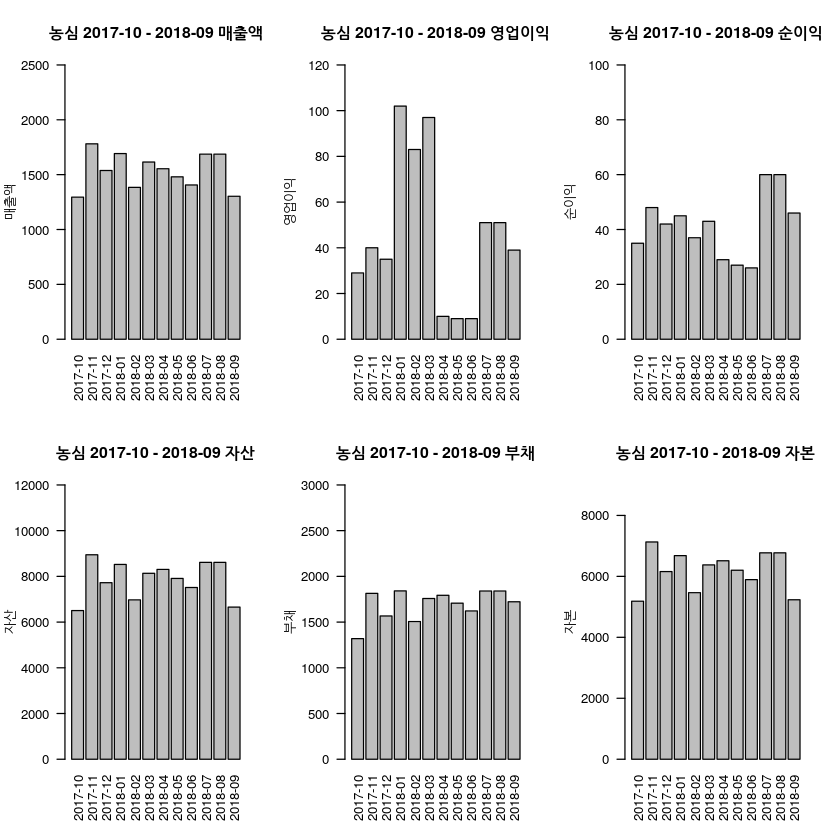

In [58]:
par(mfrow = c(2,3))
barplot(data_nongshim2$매출액,
        main = "농심 2017-10 - 2018-09 매출액",
        ylab = "매출액",
        border = "black",
        names = c("2017-10","2017-11","2017-12","2018-01","2018-02","2018-03","2018-04",
                 "2018-05","2018-06","2018-07","2018-08","2018-09"),
        ylim = c(0,2500),
        col = "grey",
        las=2
       )
barplot(data_nongshim2$영업이익,
        main = "농심 2017-10 - 2018-09 영업이익",
        ylab = "영업이익",
        border = "black",
        names = c("2017-10","2017-11","2017-12","2018-01","2018-02","2018-03","2018-04",
                 "2018-05","2018-06","2018-07","2018-08","2018-09"),
        ylim = c(0,120),
        col = "grey",
        las=2
       )
barplot(data_nongshim2$순이익,
        main = "농심 2017-10 - 2018-09 순이익",
        ylab = "순이익",
        border = "black",
        names = c("2017-10","2017-11","2017-12","2018-01","2018-02","2018-03","2018-04",
                 "2018-05","2018-06","2018-07","2018-08","2018-09"),
        ylim = c(0,100),
        col = "grey",
        las=2
       )
barplot(data_nongshim2$자산,
        main = "농심 2017-10 - 2018-09 자산",
        ylab = "자산",
        border = "black",
        names = c("2017-10","2017-11","2017-12","2018-01","2018-02","2018-03","2018-04",
                 "2018-05","2018-06","2018-07","2018-08","2018-09"),
        ylim = c(0,12000),
        col = "grey",
        las=2
       )
barplot(data_nongshim2$부채,
        main = "농심 2017-10 - 2018-09 부채",
        ylab = "부채",
        border = "black",
        names = c("2017-10","2017-11","2017-12","2018-01","2018-02","2018-03","2018-04",
                 "2018-05","2018-06","2018-07","2018-08","2018-09"),
        ylim = c(0,3000),
        col = "grey",
        las=2
       )
barplot(data_nongshim2$자본,
        main = "농심 2017-10 - 2018-09 자본",
        ylab = "자본",
        border = "black",
        names = c("2017-10","2017-11","2017-12","2018-01","2018-02","2018-03","2018-04",
                 "2018-05","2018-06","2018-07","2018-08","2018-09"),
        ylim = c(0,9000),
        col = "grey",
        las=2
       )

농심의 2분기 영업이익이 현저히 낮은것을 알 수 있는데 이 기간은 국물 라면 비수기 시즌   
농심의 대표적인 라면들은 거의 국물 라면인것을 감안하면, 어느정도 예상이 가능한 수치   

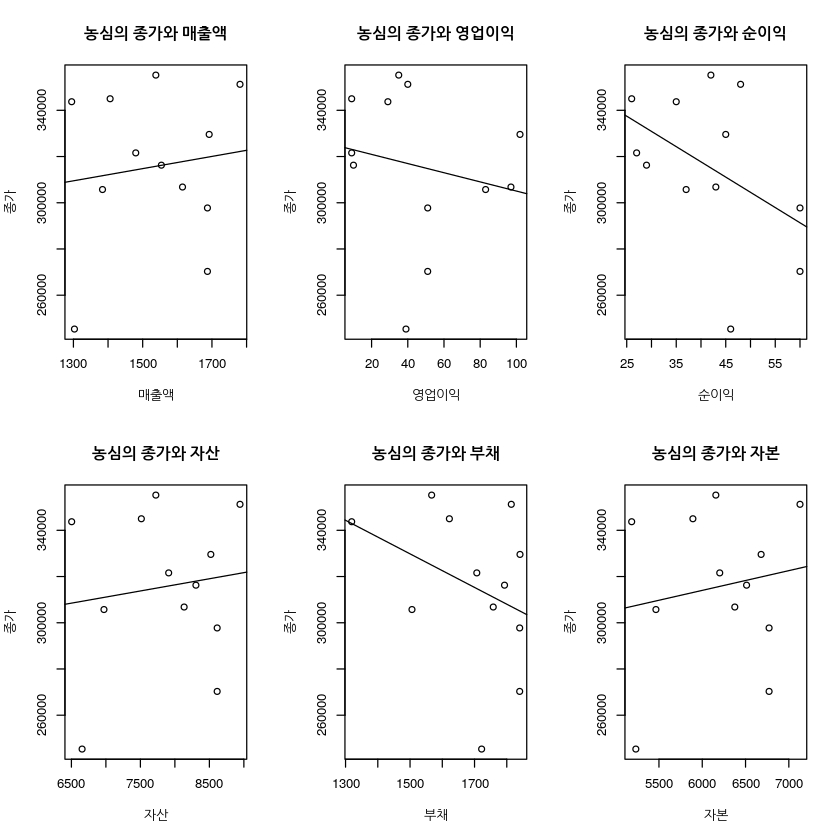

In [112]:
par(mfrow = c(2,3))
# 산점도
plot(data_nongshim2$종가 ~    data_nongshim2$매출액,
    main = "농심의 종가와 매출액",
    xlab = "매출액",
    ylab = "종가") # ~ 연산자 기준으로 뒤에 쓰는게 종속변수, 앞에 쓰는게 독립변수
# 회귀분석 : lm(종속변수 ~ 독립변수)
r_n <- lm(data_nongshim2$종가 ~ data_nongshim2$매출액)
# 회귀선 그리기
abline(r_n)

plot(data_nongshim2$종가 ~    data_nongshim2$영업이익,
    main = "농심의 종가와 영업이익",
    xlab = "영업이익",
    ylab = "종가") # ~ 연산자 기준으로 뒤에 쓰는게 종속변수, 앞에 쓰는게 독립변수
# 회귀분석 : lm(종속변수 ~ 독립변수)
r_n <- lm(data_nongshim2$종가 ~ data_nongshim2$영업이익)
# 회귀선 그리기
abline(r_n)

plot(data_nongshim2$종가 ~    data_nongshim2$순이익,
    main = "농심의 종가와 순이익",
    xlab = "순이익",
    ylab = "종가") # ~ 연산자 기준으로 뒤에 쓰는게 종속변수, 앞에 쓰는게 독립변수
# 회귀분석 : lm(종속변수 ~ 독립변수)
r_n <- lm(data_nongshim2$종가 ~ data_nongshim2$순이익)
# 회귀선 그리기
abline(r_n)

plot(data_nongshim2$종가 ~    data_nongshim2$자산,
    main = "농심의 종가와 자산",
    xlab = "자산",
    ylab = "종가") # ~ 연산자 기준으로 뒤에 쓰는게 종속변수, 앞에 쓰는게 독립변수
# 회귀분석 : lm(종속변수 ~ 독립변수)
r_n <- lm(data_nongshim2$종가 ~ data_nongshim2$자산)
# 회귀선 그리기
abline(r_n)

plot(data_nongshim2$종가 ~    data_nongshim2$부채,
    main = "농심의 종가와 부채",
    xlab = "부채",
    ylab = "종가") # ~ 연산자 기준으로 뒤에 쓰는게 종속변수, 앞에 쓰는게 독립변수
# 회귀분석 : lm(종속변수 ~ 독립변수)
r_n <- lm(data_nongshim2$종가 ~ data_nongshim2$부채)
# 회귀선 그리기
abline(r_n)

plot(data_nongshim2$종가 ~    data_nongshim2$자본,
    main = "농심의 종가와 자본",
    xlab = "자본",
    ylab = "종가") # ~ 연산자 기준으로 뒤에 쓰는게 종속변수, 앞에 쓰는게 독립변수
# 회귀분석 : lm(종속변수 ~ 독립변수)
r_n <- lm(data_nongshim2$종가 ~ data_nongshim2$자본)
# 회귀선 그리기
abline(r_n)

In [60]:
model_n <- lm(종가 ~ ., data = data_nongshim2)
model_n


Call:
lm(formula = 종가 ~ ., data = data_nongshim2)

Coefficients:
(Intercept)       매출액     영업이익       순이익         자산         부채  
   301655.6     -10273.7       9649.6       7299.3      -2802.5       -146.3  
       자본  
     6023.4  


In [61]:
summary(model_n)


Call:
lm(formula = 종가 ~ ., data = data_nongshim2)

Residuals:
  2017-10   2017-11   2017-12   2018-01   2018-02   2018-03   2018-04   2018-05 
   -70.26    335.87   -516.07  10949.05  -7027.20  -5613.85 -15995.25   1018.49 
  2018-06   2018-07   2018-08   2018-09 
 16539.10  13926.10 -13528.40    -17.58 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)   
(Intercept) 301655.63   56694.01   5.321  0.00314 **
매출액      -10273.67   11794.49  -0.871  0.42356   
영업이익      9649.57   10834.21   0.891  0.41391   
순이익        7299.30   10745.87   0.679  0.52713   
자산         -2802.47    2974.72  -0.942  0.38940   
부채          -146.32      70.07  -2.088  0.09109 . 
자본          6023.44    6542.96   0.921  0.39950   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 14890 on 5 degrees of freedom
Multiple R-squared:  0.9092,	Adjusted R-squared:  0.8002 
F-statistic: 8.344 on 6 and 5 DF,  p-value: 0.01712


In [62]:
reduced_n <- step(model_n, direction = "backward")

Start:  AIC=234.1
종가 ~ 매출액 + 영업이익 + 순이익 + 자산 + 부채 + 
    자본

           Df Sum of Sq        RSS    AIC
- 순이익    1 102296944 1210841037 233.16
- 매출액    1 168219430 1276763524 233.79
- 영업이익  1 175875124 1284419217 233.86
- 자본      1 187898037 1296442131 233.98
- 자산      1 196776556 1305320650 234.06
<none>                  1108544094 234.10
- 부채      1 966945123 2075489217 239.62

Step:  AIC=233.16
종가 ~ 매출액 + 영업이익 + 자산 + 부채 + 자본

           Df  Sum of Sq        RSS    AIC
<none>                   1210841037 233.16
- 부채      1 1052801508 2263642545 238.66
- 자산      1 2037192531 3248033568 243.00
- 영업이익  1 2245551021 3456392058 243.74
- 자본      1 2513399429 3724240466 244.64
- 매출액    1 2596372548 3807213585 244.90


In [63]:
summary(reduced_n)


Call:
lm(formula = 종가 ~ 매출액 + 영업이익 + 자산 + 부채 + 
    자본, data = data_nongshim2)

Residuals:
   Min     1Q Median     3Q    Max 
-13276  -7678  -2193   6755  17986 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 311875.78   52150.03   5.980 0.000981 ***
매출액       -2274.81     634.21  -3.587 0.011547 *  
영업이익      2306.75     691.52   3.336 0.015694 *  
자산          -789.61     248.52  -3.177 0.019143 *  
부채          -151.70      66.42  -2.284 0.062452 .  
자본          1590.62     450.72   3.529 0.012381 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 14210 on 6 degrees of freedom
Multiple R-squared:  0.9008,	Adjusted R-squared:  0.8182 
F-statistic:  10.9 on 5 and 6 DF,  p-value: 0.005702


p-value : 0.005702 < 0.05 ===> 회귀분석이 가능하다   
R-squared : 0.8182 (설명력 80%)

In [64]:
lm(종가 ~ 매출액 + 영업이익 + 자산 + 부채 + 자본, data=data_nongshim2)


Call:
lm(formula = 종가 ~ 매출액 + 영업이익 + 자산 + 부채 + 
    자본, data = data_nongshim2)

Coefficients:
(Intercept)       매출액     영업이익         자산         부채         자본  
   311875.8      -2274.8       2306.7       -789.6       -151.7       1590.6  


농심 주가 예측 회귀식   
Y = (-2274.8)x1 + 2306.7x2 + (-789.6)x3 + (-151.7)x4 + 1590.6x5 + 311875.8  

# -----------------------------------------------------------------------------------------------------------

## 2) 오뚜기 데이터 추론 및 예측

In [65]:
data_ottugi

,매출액,영업이익,순이익,자산,부채,자본,종가
2017.12,4897,263,137,14058,4404,9654,801157.9
2018.03,5483,360,319,14975,5223,9752,716523.8
2018.06,5136,342,263,15146,5141,10005,855894.7
2018.09,5455,362,619,16249,5450,10799,719411.8


2017년 10월 : 16, 1374, 73, 36, 3946, 1236, 2709, 763875   
2017년 11월 : 22, 1890, 101, 50, 5425, 1699, 3726, 780181.8   
2017년 12월 : 19, 1632, 87, 43, 4686, 1468, 3218, 801157.9   
     
2018년     
1월 : 22, 1977, 129, 115, 5400, 1883, 3517, 785909.1     
2월 : 18, 1617, 106, 94, 4418, 1541, 2877, 713444.4     
3월 : 21, 1887, 123, 109, 5155, 1798, 3357, 716223.8     
4월 : 21, 1797, 117, 92, 5301, 1799, 3501, 773381     
5월 : 20, 1712, 112, 87, 5048, 1713, 3335, 768300     
6월 : 19, 1626, 106, 83, 4796, 1627, 3168, 855894.7      
7월 : 22, 1967, 130, 223, 5860, 1965, 3894, 842772.7     
8월 : 22, 1967, 130, 223, 5860, 1965, 3894, 804000     
9월 : 17, 1520, 100, 172, 4528, 1518, 3009, 719411.8    

In [66]:
o_2017 <- ottugi[ottugi$연도==2017,]
o_2018 <- ottugi[ottugi$연도==2018,]

In [67]:
aggregate(종가 ~ 월, o_2017, mean)

월,종가
01,645450.0
02,730850.0
03,720818.2
04,754500.0
05,801210.5
06,834381.0
07,771476.2
08,763590.9
09,741571.4
10,763875.0


In [68]:
aggregate(종가 ~ 월, o_2018, mean)

월,종가
01,785909.1
02,713444.4
03,716523.8
04,773381.0
05,768300.0
06,855894.7
07,842772.7
08,804000.0
09,719411.8
10,683190.5


In [69]:
data_ottugi2 <- data.frame(매출액 = c(1374,1890,1632,1977,1617,1887,1797,1712,1626,1967,1967,1520),
           영업이익 = c(73,101,87,129,106,123,117,112,106,130,130,100),
           순이익 = c(36,50,43,115,94,109,92,87,83,223,223,172),
           자산 = c(3946,5425,4686,5400,4418,5155,5301,5048,4796,5860,5860,4528),
           부채 = c(1236,1699,1468,1883,1541,1798,1799,1713,1627,1965,1965,1518),
           자본 = c(2709,3726,3218,3517,2877,3357,3501,3335,3168,3894,3894,3009),
           종가 = c(763875,780181.8,801157.9,785909.1,713444.4,716223.8,773381,768300,855894.7,842772.7,804000,719411.8)
          )

In [70]:
row.names(data_ottugi2) <- c("2017-10","2017-11","2017-12","2018-01","2018-02","2018-03","2018-04","2018-05","2018-06",
                               "2018-07","2018-08","2018-09")

In [71]:
data_ottugi2

,매출액,영업이익,순이익,자산,부채,자본,종가
2017-10,1374,73,36,3946,1236,2709,763875.0
2017-11,1890,101,50,5425,1699,3726,780181.8
2017-12,1632,87,43,4686,1468,3218,801157.9
2018-01,1977,129,115,5400,1883,3517,785909.1
2018-02,1617,106,94,4418,1541,2877,713444.4
2018-03,1887,123,109,5155,1798,3357,716223.8
2018-04,1797,117,92,5301,1799,3501,773381.0
2018-05,1712,112,87,5048,1713,3335,768300.0
2018-06,1626,106,83,4796,1627,3168,855894.7
2018-07,1967,130,223,5860,1965,3894,842772.7


In [100]:
shapiro.test(data_ottugi2$종가)


	Shapiro-Wilk normality test

data:  data_ottugi2$종가
W = 0.93733, p-value = 0.4643


shapiro.test 결과 p-value = 0.4643로 알파값 0.05보다 크기 때문에 정규분포를 이룬다는 것을 확인 가능   
즉, 회귀분석을 통한 예측이 신빙성이 있다.

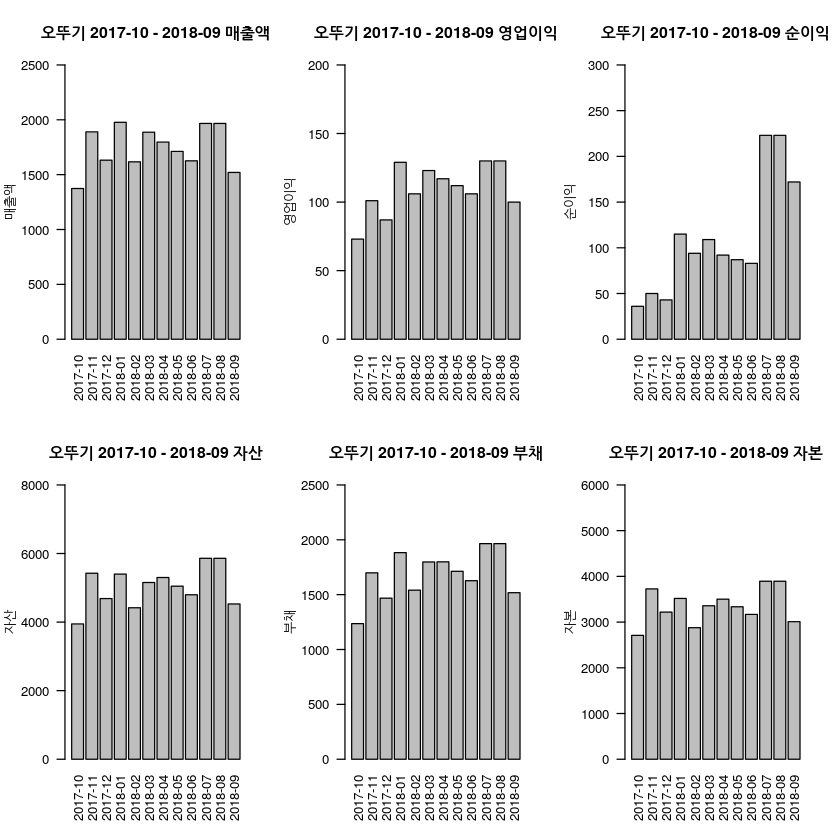

In [72]:
par(mfrow = c(2,3))
barplot(data_ottugi2$매출액,
        main = "오뚜기 2017-10 - 2018-09 매출액",
        ylab = "매출액",
        border = "black",
        names = c("2017-10","2017-11","2017-12","2018-01","2018-02","2018-03","2018-04",
                 "2018-05","2018-06","2018-07","2018-08","2018-09"),
        ylim = c(0,2500),
        col = "grey",
        las=2
       )
barplot(data_ottugi2$영업이익,
        main = "오뚜기 2017-10 - 2018-09 영업이익",
        ylab = "영업이익",
        border = "black",
        names = c("2017-10","2017-11","2017-12","2018-01","2018-02","2018-03","2018-04",
                 "2018-05","2018-06","2018-07","2018-08","2018-09"),
        ylim = c(0,200),
        col = "grey",
        las=2
       )
barplot(data_ottugi2$순이익,
        main = "오뚜기 2017-10 - 2018-09 순이익",
        ylab = "순이익",
        border = "black",
        names = c("2017-10","2017-11","2017-12","2018-01","2018-02","2018-03","2018-04",
                 "2018-05","2018-06","2018-07","2018-08","2018-09"),
        ylim = c(0,300),
        col = "grey",
        las=2
       )
barplot(data_ottugi2$자산,
        main = "오뚜기 2017-10 - 2018-09 자산",
        ylab = "자산",
        border = "black",
        names = c("2017-10","2017-11","2017-12","2018-01","2018-02","2018-03","2018-04",
                 "2018-05","2018-06","2018-07","2018-08","2018-09"),
        ylim = c(0,8000),
        col = "grey",
        las=2
       )
barplot(data_ottugi2$부채,
        main = "오뚜기 2017-10 - 2018-09 부채",
        ylab = "부채",
        border = "black",
        names = c("2017-10","2017-11","2017-12","2018-01","2018-02","2018-03","2018-04",
                 "2018-05","2018-06","2018-07","2018-08","2018-09"),
        ylim = c(0,2500),
        col = "grey",
        las=2
       )
barplot(data_ottugi2$자본,
        main = "오뚜기 2017-10 - 2018-09 자본",
        ylab = "자본",
        border = "black",
        names = c("2017-10","2017-11","2017-12","2018-01","2018-02","2018-03","2018-04",
                 "2018-05","2018-06","2018-07","2018-08","2018-09"),
        ylim = c(0,6000),
        col = "grey",
        las=2
       )

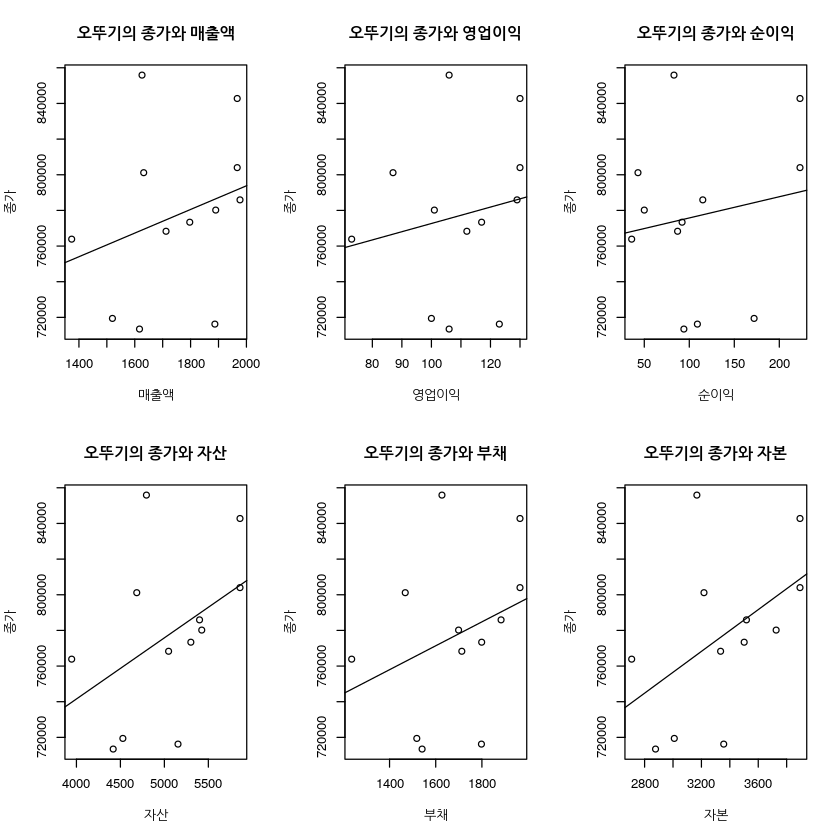

In [113]:
par(mfrow = c(2,3))
# 산점도
plot(data_ottugi2$종가 ~    data_ottugi2$매출액,
    main = "오뚜기의 종가와 매출액",
    xlab = "매출액",
    ylab = "종가") # ~ 연산자 기준으로 뒤에 쓰는게 종속변수, 앞에 쓰는게 독립변수
# 회귀분석 : lm(종속변수 ~ 독립변수)
r_o <- lm(data_ottugi2$종가 ~ data_ottugi2$매출액)
# 회귀선 그리기
abline(r_o)

plot(data_ottugi2$종가 ~    data_ottugi2$영업이익,
    main = "오뚜기의 종가와 영업이익",
    xlab = "영업이익",
    ylab = "종가") # ~ 연산자 기준으로 뒤에 쓰는게 종속변수, 앞에 쓰는게 독립변수
# 회귀분석 : lm(종속변수 ~ 독립변수)
r_o <- lm(data_ottugi2$종가 ~ data_ottugi2$영업이익)
# 회귀선 그리기
abline(r_o)

plot(data_ottugi2$종가 ~    data_ottugi2$순이익,
    main = "오뚜기의 종가와 순이익",
    xlab = "순이익",
    ylab = "종가") # ~ 연산자 기준으로 뒤에 쓰는게 종속변수, 앞에 쓰는게 독립변수
# 회귀분석 : lm(종속변수 ~ 독립변수)
r_o <- lm(data_ottugi2$종가 ~ data_ottugi2$순이익)
# 회귀선 그리기
abline(r_o)

plot(data_ottugi2$종가 ~    data_ottugi2$자산,
    main = "오뚜기의 종가와 자산",
    xlab = "자산",
    ylab = "종가") # ~ 연산자 기준으로 뒤에 쓰는게 종속변수, 앞에 쓰는게 독립변수
# 회귀분석 : lm(종속변수 ~ 독립변수)
r_o <- lm(data_ottugi2$종가 ~ data_ottugi2$자산)
# 회귀선 그리기
abline(r_o)

plot(data_ottugi2$종가 ~    data_ottugi2$부채,
    main = "오뚜기의 종가와 부채",
    xlab = "부채",
    ylab = "종가") # ~ 연산자 기준으로 뒤에 쓰는게 종속변수, 앞에 쓰는게 독립변수
# 회귀분석 : lm(종속변수 ~ 독립변수)
r_o <- lm(data_ottugi2$종가 ~ data_ottugi2$부채)
# 회귀선 그리기
abline(r_o)

plot(data_ottugi2$종가 ~    data_ottugi2$자본,
    main = "오뚜기의 종가와 자본",
    xlab = "자본",
    ylab = "종가") # ~ 연산자 기준으로 뒤에 쓰는게 종속변수, 앞에 쓰는게 독립변수
# 회귀분석 : lm(종속변수 ~ 독립변수)
r_o <- lm(data_ottugi2$종가 ~ data_ottugi2$자본)
# 회귀선 그리기
abline(r_o)

In [74]:
model_o <- lm(종가 ~ ., data = data_ottugi2)
model_o


Call:
lm(formula = 종가 ~ ., data = data_ottugi2)

Coefficients:
(Intercept)       매출액     영업이익       순이익         자산         부채  
   515216.2       -942.2      59674.9      -2212.7      66631.6     -72794.9  
       자본  
   -64850.9  


In [75]:
summary(model_o)


Call:
lm(formula = 종가 ~ ., data = data_ottugi2)

Residuals:
2017-10 2017-11 2017-12 2018-01 2018-02 2018-03 2018-04 2018-05 2018-06 2018-07 
  -6035  -34189   44524   32652  -21160  -16029  -40123   -5799   50664   26827 
2018-08 2018-09 
 -11945  -19387 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)  
(Intercept) 515216.2   158464.2   3.251   0.0227 *
매출액        -942.2     1082.0  -0.871   0.4237  
영업이익     59674.9    77055.0   0.774   0.4737  
순이익       -2212.7     2421.7  -0.914   0.4028  
자산         66631.6    58650.5   1.136   0.3074  
부채        -72794.9    64308.4  -1.132   0.3090  
자본        -64850.9    57314.0  -1.132   0.3092  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 45620 on 5 degrees of freedom
Multiple R-squared:  0.5526,	Adjusted R-squared:  0.01579 
F-statistic: 1.029 on 6 and 5 DF,  p-value: 0.4977


In [76]:
reduced_o <- step(model_o, direction = "backward")

Start:  AIC=260.97
종가 ~ 매출액 + 영업이익 + 순이익 + 자산 + 부채 + 
    자본

           Df  Sum of Sq        RSS    AIC
- 영업이익  1 1248369473 1.1656e+10 260.33
- 매출액    1 1578244097 1.1985e+10 260.67
- 순이익    1 1737631511 1.2145e+10 260.82
<none>                   1.0407e+10 260.97
- 자본      1 2664843545 1.3072e+10 261.71
- 부채      1 2667034833 1.3074e+10 261.71
- 자산      1 2686447963 1.3094e+10 261.73

Step:  AIC=260.33
종가 ~ 매출액 + 순이익 + 자산 + 부채 + 자본

         Df  Sum of Sq        RSS    AIC
- 매출액  1  355109367 1.2011e+10 258.69
- 자본    1 1426542635 1.3082e+10 259.71
- 부채    1 1428639672 1.3084e+10 259.72
- 자산    1 1440536422 1.3096e+10 259.73
- 순이익  1 1915962209 1.3571e+10 260.16
<none>                 1.1656e+10 260.33

Step:  AIC=258.69
종가 ~ 순이익 + 자산 + 부채 + 자본

         Df  Sum of Sq        RSS    AIC
- 순이익  1 1704632527 1.3715e+10 258.28
<none>                 1.2011e+10 258.69
- 자본    1 4331723509 1.6342e+10 260.38
- 자산    1 4352928246 1.6364e+10 260.40
- 부채    1 4373646143 1.6384e+10 260.42

Ste

In [77]:
summary(reduced_o)


Call:
lm(formula = 종가 ~ 자산 + 부채 + 자본, data = data_ottugi2)

Residuals:
   Min     1Q Median     3Q    Max 
-52063 -22724  -7589  21573  78283 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   566956     111184   5.099 0.000931 ***
자산           29782      23960   1.243 0.249066    
부채          -29889      23953  -1.248 0.247373    
자본          -29669      23965  -1.238 0.250799    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 41410 on 8 degrees of freedom
Multiple R-squared:  0.4104,	Adjusted R-squared:  0.1893 
F-statistic: 1.856 on 3 and 8 DF,  p-value: 0.2153


오뚜기 기업의 주가 예측은 재무제표 요인(매출액, 영업이익, 순이익, 자산, 부채, 자본)을 통한 회귀식으로 예측이 불가능하다.   
위의 기사 및 분석에서 오뚜기는 신제품(진짬뽕)이 출시된 해 가장 높은 주가와 시가총액을 기록했다.   
오뚜기 주식을 매수하려는 투자자들은 신제품 출시의 여부를 고려하여 매수 하는 것이 좋겠다.   

# -----------------------------------------------------------------------------------------------------------

## 3) 삼양 데이터 추론 및 예측

In [78]:
data_samyang

,매출액,영업이익,순이익,자산,부채,자본,종가
2017.12,1271,120,43,3815,1885,1929,86115.79
2018.03,1249,172,127,3767,1733,2034,84652.38
2018.06,1226,123,136,3973,1808,2166,106763.16
2018.09,1086,110,85,3819,1570,2250,79841.18


2017년 10월 : 16, 356, 33, 12, 1070, 529, 541, 59993.75    
2017년 11월 : 22, 490, 46, 16, 1472, 727, 744, 62077.27    
2017년 12월 : 19, 423, 40, 14, 1271, 628, 642, 86115.79    
       
2018년    
1월 : 22, 450, 62, 45, 1358, 625, 733, 87722.73     
2월 : 18, 638, 50, 37, 1111, 511, 600, 92816.67    
3월 : 21, 439, 59, 43, 1296, 596, 700, 84652.38     
4월 : 21, 429, 43, 47, 1390, 632, 758, 85076.19   
5월 : 20, 408, 41, 45, 1324, 602, 722, 97515       
6월 : 19, 388, 39, 43, 1258, 572, 685, 106763.16     
7월 : 22, 391, 40, 30, 1377, 566, 811, 95477.27     
8월 : 22, 391, 40, 30, 1377, 566, 811, 84204.55     
9월 : 17, 302, 30, 23, 1064, 437, 627, 79841.18      

In [117]:
s_2017 <- samyang[samyang$연도==2017,]
s_2018 <- samyang[samyang$연도==2018,]

In [80]:
aggregate(종가 ~ 월, s_2017, mean)

월,종가
01,39705.00
02,52517.50
03,58131.82
04,57600.00
05,61768.42
06,52940.48
07,48242.86
08,51884.09
09,54514.29
10,59993.75


In [81]:
aggregate(종가 ~ 월, s_2018, mean)

월,종가
01,87722.73
02,92816.67
03,84652.38
04,85076.19
05,97515.00
06,106763.16
07,95477.27
08,84204.55
09,79841.18
10,66319.05


In [82]:
data_samyang2 <- data.frame(매출액 = c(356,490,423,450,638,439,429,408,338,391,391,302),
           영업이익 = c(33,46,40,62,50,59,43,41,39,40,40,30),
           순이익 = c(12,16,14,45,37,43,47,45,43,30,30,23),
           자산 = c(1070,1472,1271,1358,1111,1296,1390,1324,1258,1377,1377,1064),
           부채 = c(529,727,628,625,511,596,632,602,572,566,566,437),
           자본 = c(541,744,642,733,600,700,758,722,685,811,811,627),
           종가 = c(59993.75,62077.27,86115.79,87722.73,92816.67,84652.38,85076.19,97515,106763.16,95477.27,84204.55,79841.18)
          )

In [83]:
row.names(data_samyang2) <- c("2017-10","2017-11","2017-12","2018-01","2018-02","2018-03","2018-04","2018-05","2018-06",
                               "2018-07","2018-08","2018-09")

In [97]:
data_samyang2

,매출액,영업이익,순이익,자산,부채,자본,종가
2017-10,356,33,12,1070,529,541,59993.75
2017-11,490,46,16,1472,727,744,62077.27
2017-12,423,40,14,1271,628,642,86115.79
2018-01,450,62,45,1358,625,733,87722.73
2018-02,638,50,37,1111,511,600,92816.67
2018-03,439,59,43,1296,596,700,84652.38
2018-04,429,43,47,1390,632,758,85076.19
2018-05,408,41,45,1324,602,722,97515.00
2018-06,338,39,43,1258,572,685,106763.16
2018-07,391,40,30,1377,566,811,95477.27


In [102]:
shapiro.test(data_samyang2$종가)


	Shapiro-Wilk normality test

data:  data_samyang2$종가
W = 0.91908, p-value = 0.2784


shapiro.test 결과 p-value = 0.2784로 알파값 0.05보다 크기 때문에 정규분포를 이룬다는 것을 확인 가능   
즉, 회귀분석을 통한 예측이 신빙성이 있다.

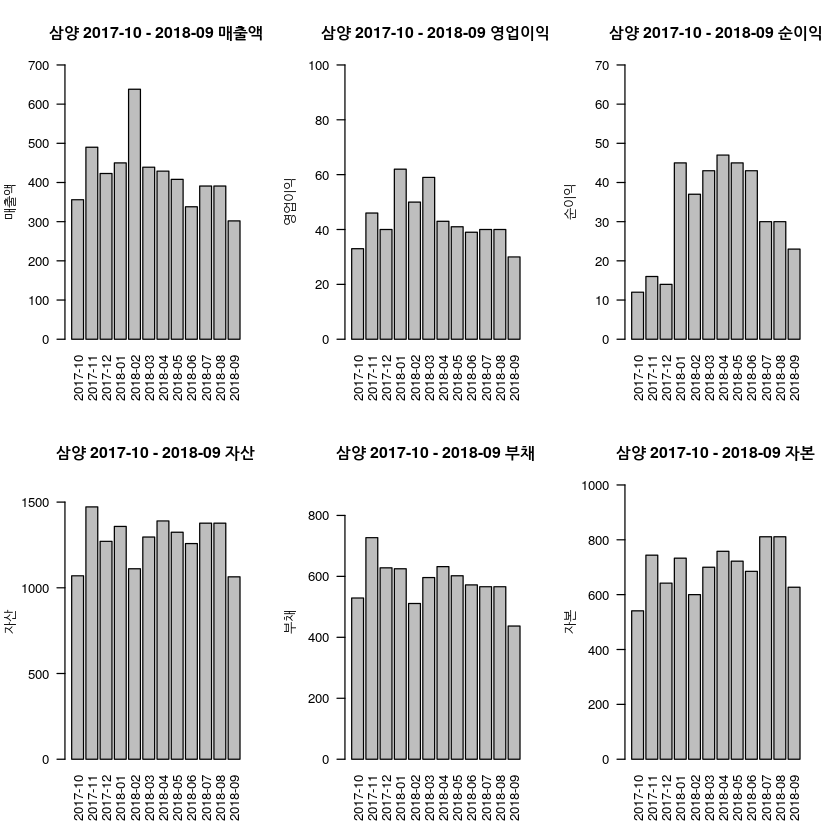

In [85]:
par(mfrow = c(2,3))
barplot(data_samyang2$매출액,
        main = "삼양 2017-10 - 2018-09 매출액",
        ylab = "매출액",
        border = "black",
        names = c("2017-10","2017-11","2017-12","2018-01","2018-02","2018-03","2018-04",
                 "2018-05","2018-06","2018-07","2018-08","2018-09"),
        ylim = c(0,700),
        col = "grey",
        las=2
       )
barplot(data_samyang2$영업이익,
        main = "삼양 2017-10 - 2018-09 영업이익",
        ylab = "영업이익",
        border = "black",
        names = c("2017-10","2017-11","2017-12","2018-01","2018-02","2018-03","2018-04",
                 "2018-05","2018-06","2018-07","2018-08","2018-09"),
        ylim = c(0,100),
        col = "grey",
        las=2
       )
barplot(data_samyang2$순이익,
        main = "삼양 2017-10 - 2018-09 순이익",
        ylab = "순이익",
        border = "black",
        names = c("2017-10","2017-11","2017-12","2018-01","2018-02","2018-03","2018-04",
                 "2018-05","2018-06","2018-07","2018-08","2018-09"),
        ylim = c(0,70),
        col = "grey",
        las=2
       )
barplot(data_samyang2$자산,
        main = "삼양 2017-10 - 2018-09 자산",
        ylab = "자산",
        border = "black",
        names = c("2017-10","2017-11","2017-12","2018-01","2018-02","2018-03","2018-04",
                 "2018-05","2018-06","2018-07","2018-08","2018-09"),
        ylim = c(0,1600),
        col = "grey",
        las=2
       )
barplot(data_samyang2$부채,
        main = "삼양 2017-10 - 2018-09 부채",
        ylab = "부채",
        border = "black",
        names = c("2017-10","2017-11","2017-12","2018-01","2018-02","2018-03","2018-04",
                 "2018-05","2018-06","2018-07","2018-08","2018-09"),
        ylim = c(0,900),
        col = "grey",
        las=2
       )
barplot(data_samyang2$자본,
        main = "삼양 2017-10 - 2018-09 자본",
        ylab = "자본",
        border = "black",
        names = c("2017-10","2017-11","2017-12","2018-01","2018-02","2018-03","2018-04",
                 "2018-05","2018-06","2018-07","2018-08","2018-09"),
        ylim = c(0,1000),
        col = "grey",
        las=2
       )

삼양식품의 2018년 2월 매출액이 굉장히 높은 것을 알 수 있는데, 이때    
'까르보 불닭볶음면'이 출시 한 달 만에, 판매수량 1,100만 개 돌파하는 쾌거를 이루었다.  

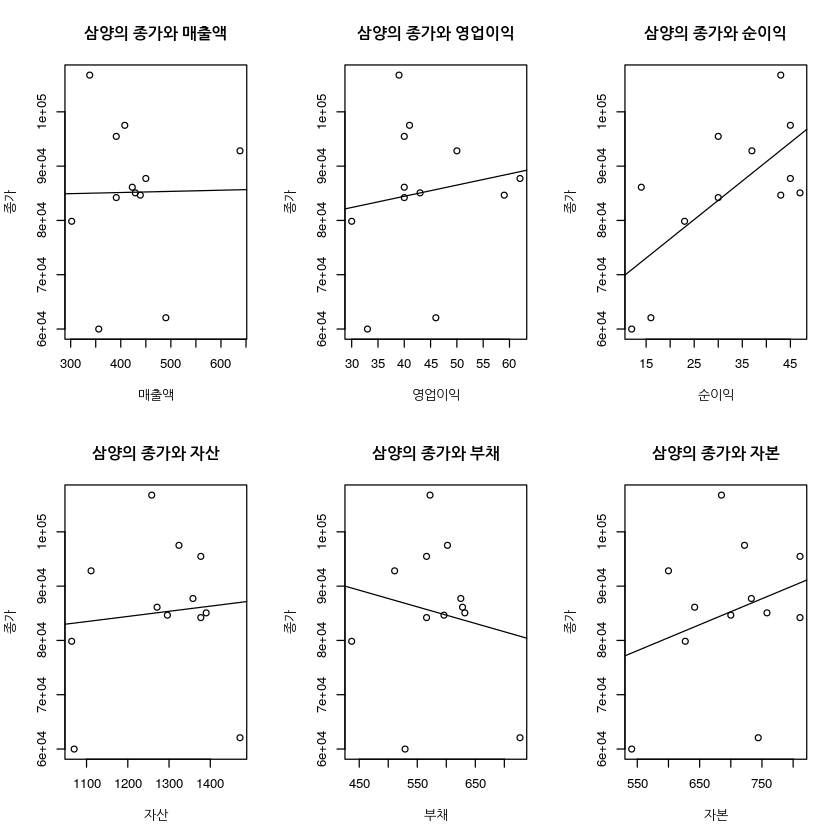

In [114]:
par(mfrow = c(2,3))
# 산점도
plot(data_samyang2$종가 ~    data_samyang2$매출액,
    main = "삼양의 종가와 매출액",
    xlab = "매출액",
    ylab = "종가") # ~ 연산자 기준으로 뒤에 쓰는게 종속변수, 앞에 쓰는게 독립변수
# 회귀분석 : lm(종속변수 ~ 독립변수)
r_s <- lm(data_samyang2$종가 ~ data_samyang2$매출액)
# 회귀선 그리기
abline(r_s)

plot(data_samyang2$종가 ~    data_samyang2$영업이익,
    main = "삼양의 종가와 영업이익",
    xlab = "영업이익",
    ylab = "종가") # ~ 연산자 기준으로 뒤에 쓰는게 종속변수, 앞에 쓰는게 독립변수
# 회귀분석 : lm(종속변수 ~ 독립변수)
r_s <- lm(data_samyang2$종가 ~ data_samyang2$영업이익)
# 회귀선 그리기
abline(r_s)

plot(data_samyang2$종가 ~    data_samyang2$순이익,
    main = "삼양의 종가와 순이익",
    xlab = "순이익",
    ylab = "종가") # ~ 연산자 기준으로 뒤에 쓰는게 종속변수, 앞에 쓰는게 독립변수
# 회귀분석 : lm(종속변수 ~ 독립변수)
r_s <- lm(data_samyang2$종가 ~ data_samyang2$순이익)
# 회귀선 그리기
abline(r_s)

plot(data_samyang2$종가 ~    data_samyang2$자산,
    main = "삼양의 종가와 자산",
    xlab = "자산",
    ylab = "종가") # ~ 연산자 기준으로 뒤에 쓰는게 종속변수, 앞에 쓰는게 독립변수
# 회귀분석 : lm(종속변수 ~ 독립변수)
r_s <- lm(data_samyang2$종가 ~ data_samyang2$자산)
# 회귀선 그리기
abline(r_s)

plot(data_samyang2$종가 ~    data_samyang2$부채,
    main = "삼양의 종가와 부채",
    xlab = "부채",
    ylab = "종가") # ~ 연산자 기준으로 뒤에 쓰는게 종속변수, 앞에 쓰는게 독립변수
# 회귀분석 : lm(종속변수 ~ 독립변수)
r_s <- lm(data_samyang2$종가 ~ data_samyang2$부채)
# 회귀선 그리기
abline(r_s)

plot(data_samyang2$종가 ~    data_samyang2$자본,
    main = "삼양의 종가와 자본",
    xlab = "자본",
    ylab = "종가") # ~ 연산자 기준으로 뒤에 쓰는게 종속변수, 앞에 쓰는게 독립변수
# 회귀분석 : lm(종속변수 ~ 독립변수)
r_s <- lm(data_samyang2$종가 ~ data_samyang2$자본)
# 회귀선 그리기
abline(r_s)

In [87]:
model_s <- lm(종가 ~ ., data = data_samyang2)
model_s


Call:
lm(formula = 종가 ~ ., data = data_samyang2)

Coefficients:
(Intercept)       매출액     영업이익       순이익         자산         부채  
   82809.43        26.08      -120.80       857.59     19811.10    -19946.23  
       자본  
  -19749.61  


In [88]:
summary(model_s)


Call:
lm(formula = 종가 ~ ., data = data_samyang2)

Residuals:
2017-10 2017-11 2017-12 2018-01 2018-02 2018-03 2018-04 2018-05 2018-06 2018-07 
 -190.9 -9001.3 10669.8  1454.3  -169.5 -1865.7 -5246.3  7373.7 -1668.5  8184.4 
2018-08 2018-09 
-3088.3 -6451.7 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)  
(Intercept)  82809.43   29102.85   2.845   0.0360 *
매출액          26.08      41.50   0.628   0.5573  
영업이익      -120.80     485.86  -0.249   0.8135  
순이익         857.59     285.72   3.002   0.0300 *
자산         19811.10    8457.12   2.343   0.0662 .
부채        -19946.23    8500.54  -2.346   0.0658 .
자본        -19749.61    8441.91  -2.339   0.0664 .
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 8982 on 5 degrees of freedom
Multiple R-squared:  0.7971,	Adjusted R-squared:  0.5535 
F-statistic: 3.273 on 6 and 5 DF,  p-value: 0.1071


In [89]:
reduced_s <- step(model_s, direction = "backward")

Start:  AIC=221.97
종가 ~ 매출액 + 영업이익 + 순이익 + 자산 + 부채 + 
    자본

           Df Sum of Sq        RSS    AIC
- 영업이익  1   4986582  408342522 220.11
- 매출액    1  31860840  435216780 220.88
<none>                   403355941 221.97
- 자본      1 441523992  844879932 228.84
- 자산      1 442680657  846036598 228.85
- 부채      1 444168237  847524178 228.88
- 순이익    1 726779396 1130135336 232.33

Step:  AIC=220.11
종가 ~ 매출액 + 순이익 + 자산 + 부채 + 자본

         Df Sum of Sq        RSS    AIC
- 매출액  1  27223303  435565825 218.89
<none>                 408342522 220.11
- 자본    1 499198472  907540994 227.70
- 자산    1 500643682  908986204 227.72
- 부채    1 503186117  911528640 227.75
- 순이익  1 903811096 1312153619 232.12

Step:  AIC=218.89
종가 ~ 순이익 + 자산 + 부채 + 자본

         Df  Sum of Sq        RSS    AIC
<none>                  435565825 218.89
- 자본    1  472008800  907574625 225.70
- 자산    1  473472503  909038328 225.72
- 부채    1  476048171  911613997 225.75
- 순이익  1 1002701731 1438267556 231.22


In [90]:
summary(reduced_s)


Call:
lm(formula = 종가 ~ 순이익 + 자산 + 부채 + 자본, data = data_samyang2)

Residuals:
   Min     1Q Median     3Q    Max 
 -7931  -3783  -2180   5136  10679 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)   
(Intercept)  89829.0    23624.1   3.802  0.00669 **
순이익         848.7      211.4   4.014  0.00510 **
자산         19200.2     6960.4   2.758  0.02816 * 
부채        -19327.7     6987.7  -2.766  0.02786 * 
자본        -19146.3     6951.6  -2.754  0.02833 * 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 7888 on 7 degrees of freedom
Multiple R-squared:  0.7808,	Adjusted R-squared:  0.6556 
F-statistic: 6.235 on 4 and 7 DF,  p-value: 0.01839


p-value : 0.01839 < 0.05  ===> 회귀분석이 가능하다   
R-squared : 0.6556 (설명력 65%)

In [91]:
lm(종가 ~ 순이익 + 자산 + 부채 + 자본, data=data_samyang2)


Call:
lm(formula = 종가 ~ 순이익 + 자산 + 부채 + 자본, data = data_samyang2)

Coefficients:
(Intercept)       순이익         자산         부채         자본  
    89829.0        848.7      19200.2     -19327.7     -19146.3  


Y = 848.7x1 + 19200.2x2 + (-19327.7)x3 + (-19146.3)x4 + 89829

# -----------------------------------------------------------------------------------------------------------
# 3. 분석 후기 및 한계점

#### 약 일주일에 걸친 주가 분석을 해보았다. 현황 분석은 어느 정도 할 수 있었지만   
#### 회귀분석을 하는 과정에서 많은 어려움을 겪었는데. 종속변수가 되는 종가 데이터가 정규분포를 이루지 않았기 때문이다.    
#### 물론 로그변환 등 다른 방법을 통하여 정규화 시킬 수 있었지만 주가 데이터를 정규화 시킨다는 것은 데이터의 오류라고 판단
#### 따라서 샘플링을 통해 정규분포를 맞추고 회귀분석을 실시하였는데 데이터의 수가 너무 작았기 때문에    
#### 이 분석 결과가 높은 신뢰도를 가진다고 말할 수는 없다.    
#### 결론적으로 내가 하고자 싶은 정확한 예측은 불가능했지만, 현황 분석을 통해     
#### 내가 선택한 세 기업의 전반적인 주식 흐름을 알 수 있었고 분석에 대한 지식을 더 높일 수 있는 계기가 되는 프로젝트였다.     
#### 다음 주가 분석을 할때는 외국 기업을 대상으로 주가 분석을 해보고 싶다.